In [32]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

# Read File

In [2]:
df = pd.read_csv(r"D:\Downloads\BTC-Daily.csv")

In [3]:
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


# Part 1: Data Exploration and Preparetion

# Describe Dataset

In [4]:
df.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,2.651000e+03,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,1.531613e+09,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
std,6.613247e+07,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08
min,1.417133e+09,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,1.474373e+09,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,1.531613e+09,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,1.588853e+09,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,1.646093e+09,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


# Range of dates covered

In [5]:
df['date'] = pd.to_datetime(df['date']) 
date_range = str(df['date'].dt.date.min()) + ' to ' +str(df['date'].dt.date.max())
print(date_range)

2014-11-28 to 2022-03-01


# Statistic of closing price

In [6]:
df["close"].describe()

count     2651.000000
mean     11709.326213
std      16282.908704
min        162.000000
25%        654.370000
50%       6407.770000
75%      10726.425000
max      67559.000000
Name: close, dtype: float64

# Visualizations of Daily Closing Price using line plot

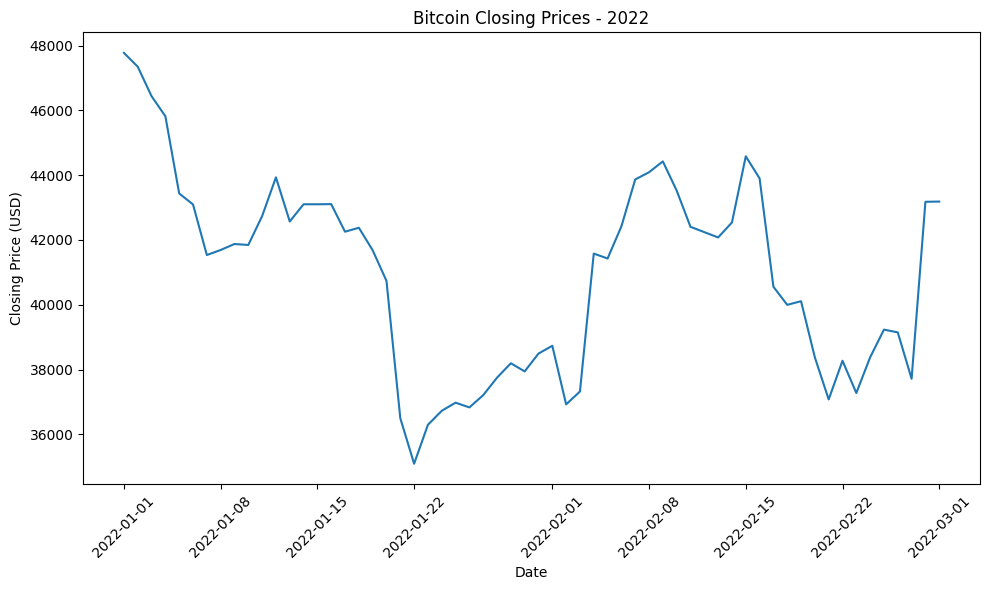

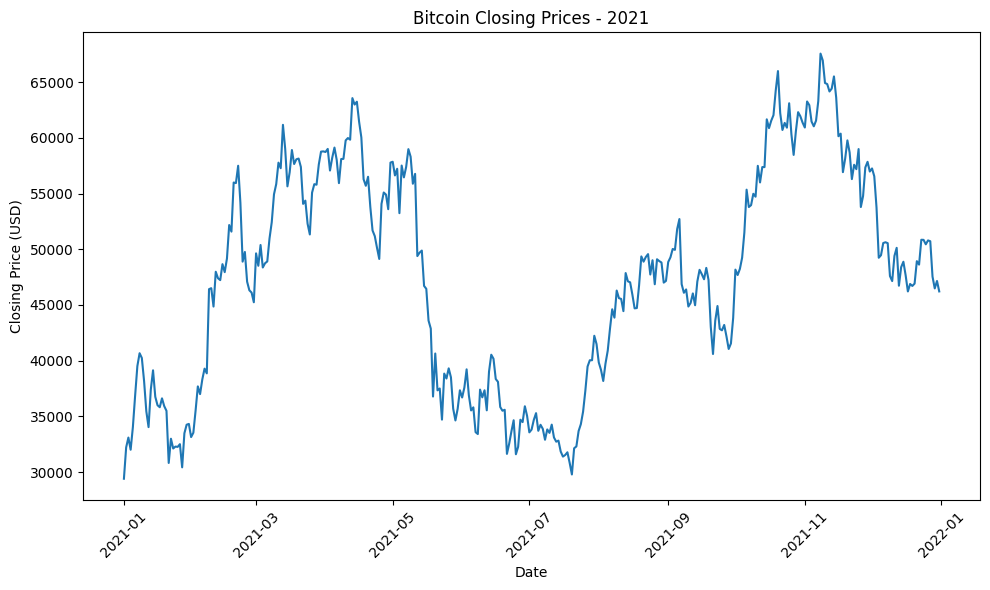

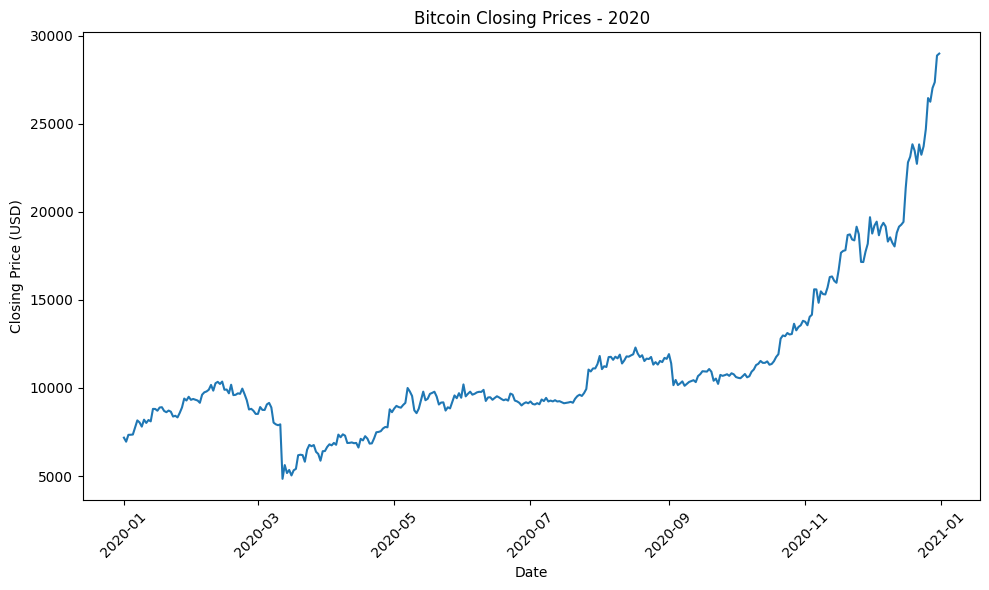

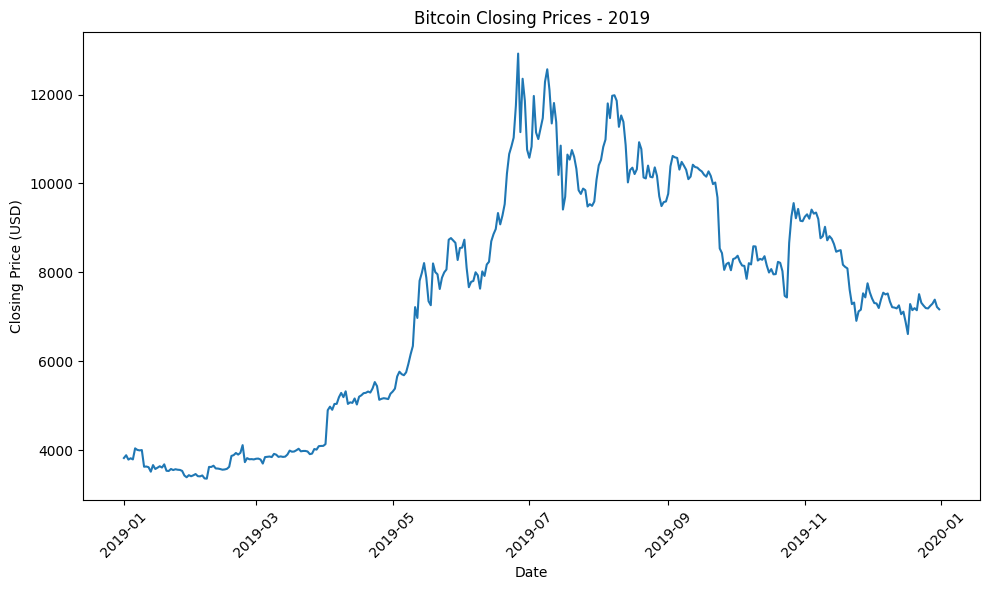

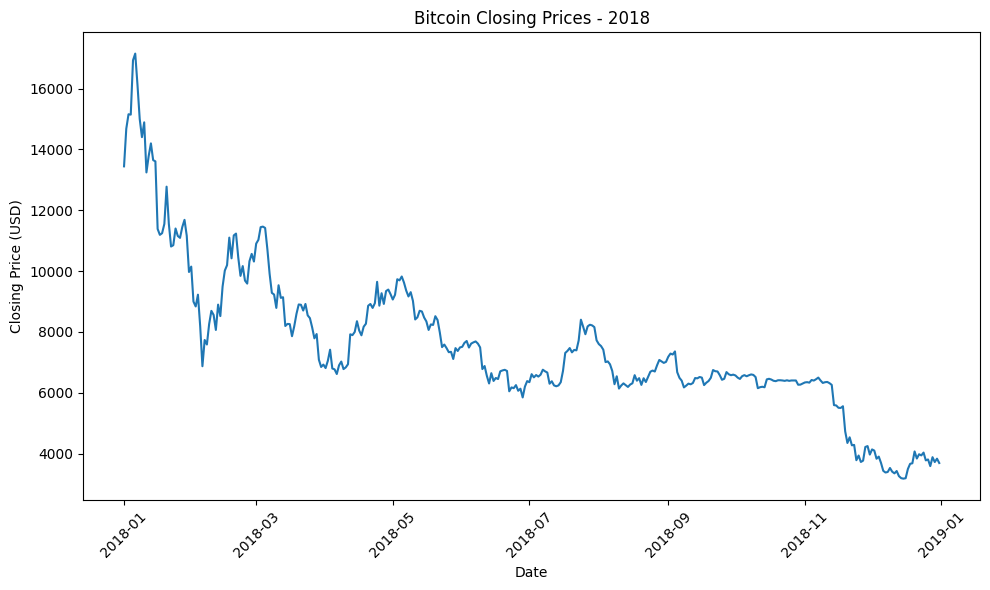

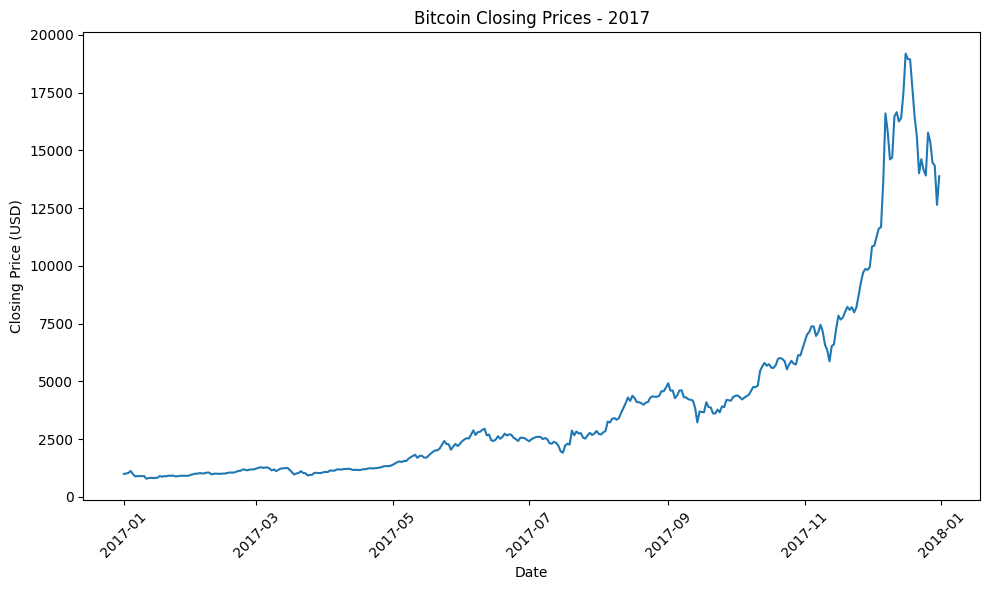

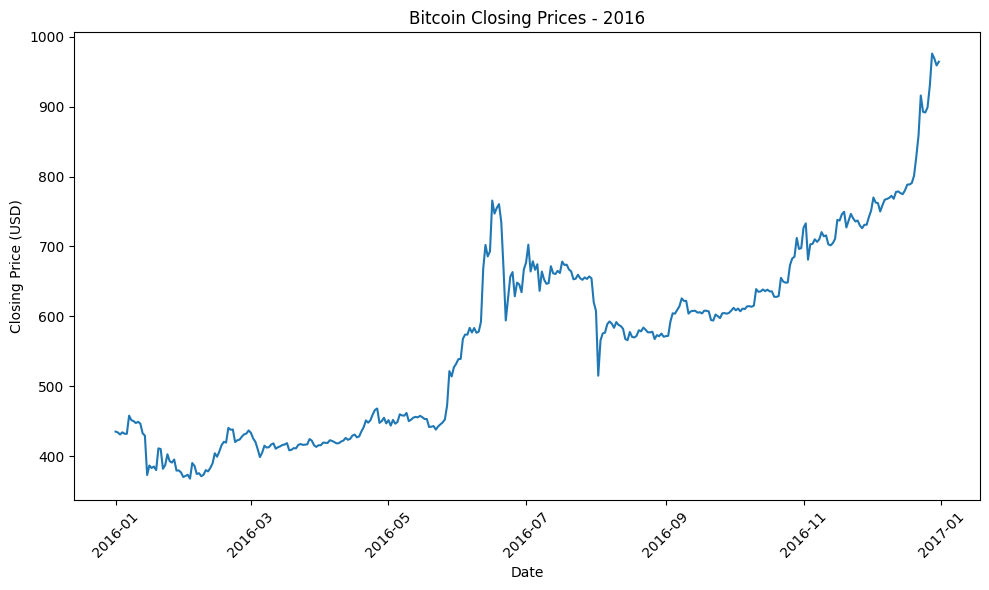

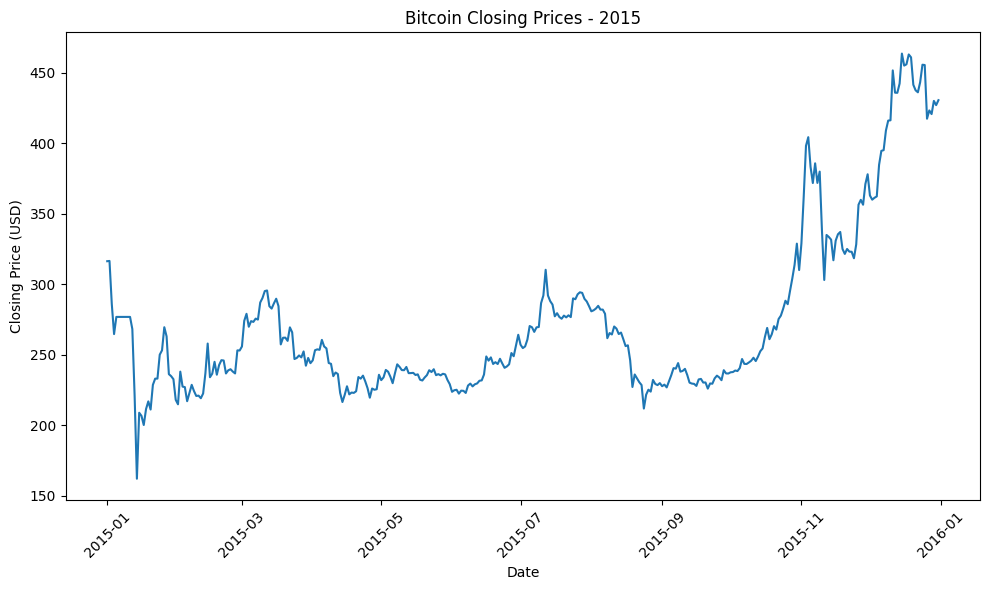

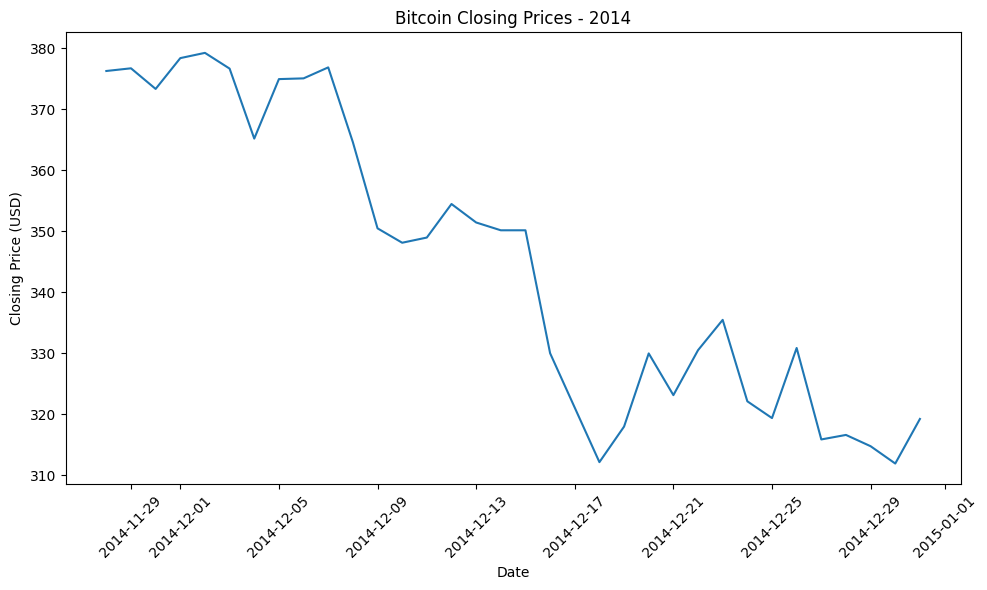

In [7]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


unique_years = df['year'].unique()
for year in unique_years:
    
    dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')
    year_month_day = pd.DataFrame({'date': dates})
    year_month_day['year'] = year_month_day['date'].dt.year
    year_month_day['month'] = year_month_day['date'].dt.month
    year_month_day['day'] = year_month_day['date'].dt.day
    
    
    merged_data = pd.merge(year_month_day, df, on=['year', 'month', 'day'], how='left')
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['date_x'], merged_data['close'])
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

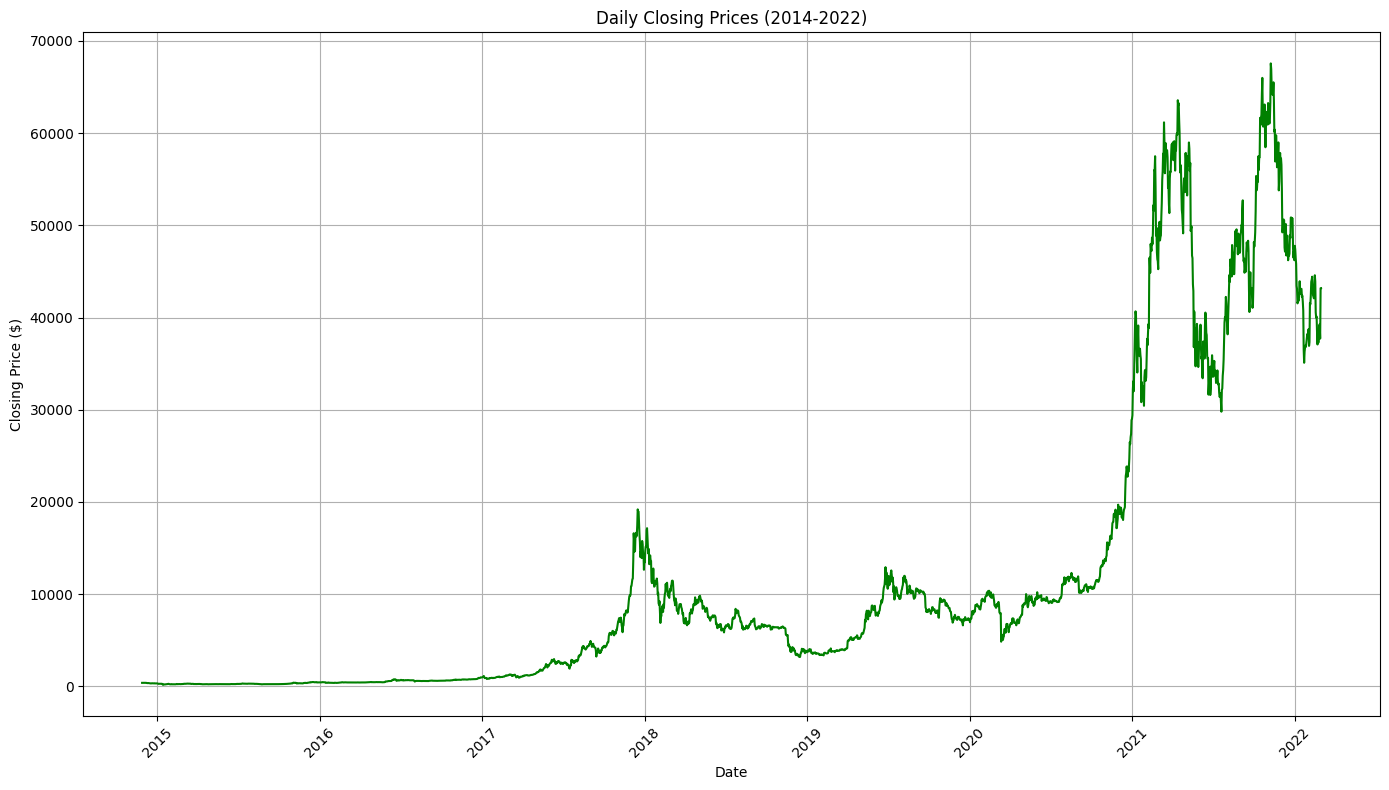

In [8]:
plt.figure(figsize=(14, 8))
plt.plot(df['date'], df['close'], linestyle='-', color='g')
plt.title('Daily Closing Prices (2014-2022)')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Checking for Null Values in dataset

In [9]:
df.isnull().sum()

#As can be seen there are no NULL values in the data

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
year          0
month         0
day           0
dtype: int64

# Standardizing the prices for Modeling and plotting them

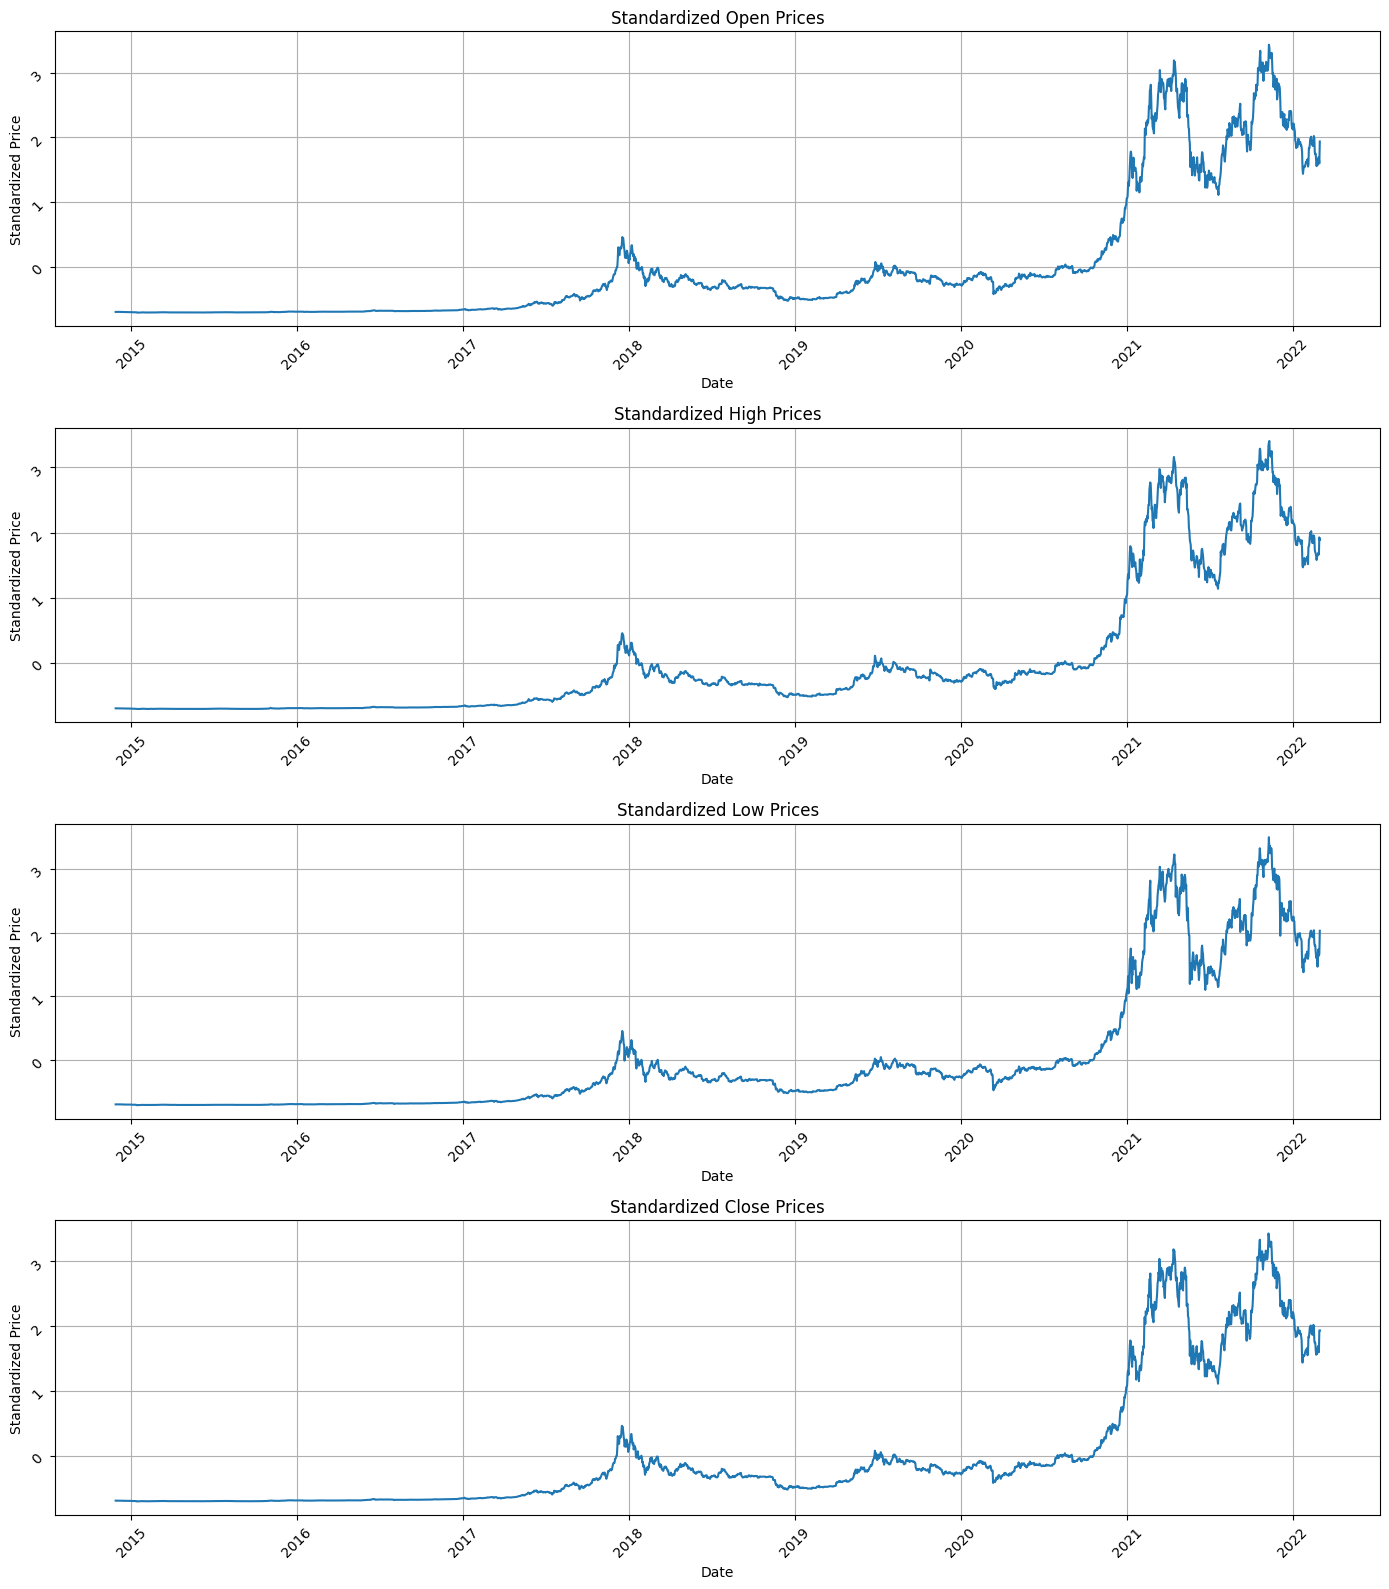

In [10]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

df["Standardized_Close_Prices"] = scalar.fit_transform(df["close"].values.reshape(-1,1))
df["Standardized_Open_Prices"] = scalar.fit_transform(df["open"].values.reshape(-1,1))
df["Standardized_High_Prices"] = scalar.fit_transform(df["high"].values.reshape(-1,1))
df["Standardized_Low_Prices"] = scalar.fit_transform(df["low"].values.reshape(-1,1))

# Plot
fig, axes = plt.subplots(4, 1, figsize=(14, 16))

axes[0].plot(df['date'], df['Standardized_Open_Prices'], label='Standardized Open Prices')
axes[0].set_title('Standardized Open Prices')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Standardized Price')
axes[0].grid(True)
axes[0].tick_params(rotation=45)

axes[1].plot(df['date'], df['Standardized_High_Prices'], label='Standardized High Prices')
axes[1].set_title('Standardized High Prices')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Standardized Price')
axes[1].grid(True)
axes[1].tick_params(rotation=45)

axes[2].plot(df['date'], df['Standardized_Low_Prices'], label='Standardized Low Prices')
axes[2].set_title('Standardized Low Prices')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Standardized Price')
axes[2].grid(True)
axes[2].tick_params(rotation=45)

axes[3].plot(df['date'], df['Standardized_Close_Prices'], label='Standardized Close Prices')
axes[3].set_title('Standardized Close Prices')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Standardized Price')
axes[3].grid(True)
axes[3].tick_params(rotation=45)

plt.tight_layout()
plt.show()

# Why Standardize?
#Answer) Because fair comparison between stocks bringing all prices to similar scale. Some machine learning models, such as linear regression or neural networks,
# perform better when the input features are on a similar scale. Standardizing the prices can help improve the performance and stability of these models. To reduce the effect 
# of outliers.

# Part 2: Building Forecasting Models

In [11]:
#Converting Date to numerical form

df['date_str'] = df['date'].dt.strftime('%Y%m%d%H%M%S')

# Convert the string date to a numerical value
df['NumericalDate'] = pd.to_numeric(df['date_str'])

# Drop the intermediate 'date_str' column if not needed
df.drop(columns=['date_str'], inplace=True)



# Appropriateness of Linear Regression Model with its Evaluation, Cross Validation and Residual Analysis

Linear Regression model can help predict future prices based on historical data. It can help identify trends in BTC prices over time and predict whether they are likely to continue or reverse.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae

X = df[["NumericalDate", "Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Checking Coefficient and Intercept

In [13]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [ 2.15787085e-14 -5.23216881e-01  9.57861704e-01  5.64130012e-01]
LR Intercept: 
 -0.4356869564054533


Evaluating Linear Regression Model

In [14]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Root Mean Square Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Square Error (RMSE): 0.020934348941531237
Mean Absolute Error (MAE): 0.008924554062532735
Mean Absolute Percentage Error (MAPE): 31.75588709979682


Accuracy

In [15]:
from sklearn.metrics import r2_score

# Assuming y_test contains the actual labels for X_test
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)

R-squared (R2) score: 0.9995581269345698


Root Mean Square Error (RMSE): 0.0209
This means that, on average, the predicted values from the model are about 0.0209 standard deviations away from the actual values. Lower values indicate better accuracy.
Mean Absolute Error (MAE): 0.0089
This means that, on average, the predicted values from the model are about 0.0089 standard deviations away from the actual values. Again, lower values indicate better accuracy.
Mean Absolute Percentage Error (MAPE): 31.76%
This means that, on average, the predictions from the model are off by about 31.76% relative to the actual values. This error metric provides the relative error compared to the magnitude of the actual values. Lower values indicate better accuracy.

Plotting best fit line and check r square so I know how best the line fit

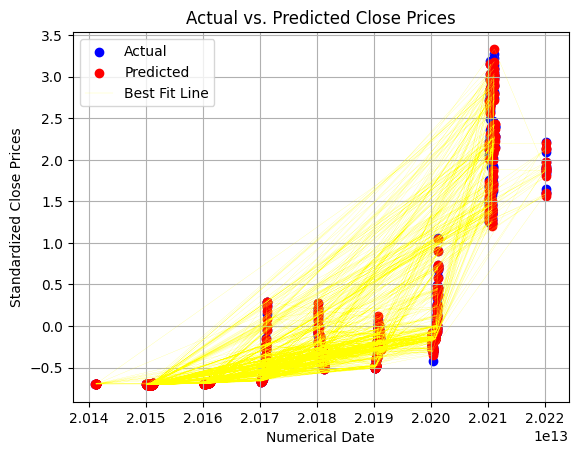

R-squared value: 0.9995581269345698
As its near to 1 which indicated its an excellent fit


In [16]:
plt.scatter(X_test["NumericalDate"], y_test, color='blue', label='Actual')

# Plot the predicted values
plt.scatter(X_test["NumericalDate"], y_pred, color='red', label='Predicted')

# Plot the best fit line
plt.plot(X_test["NumericalDate"], y_pred, color='yellow', linewidth=0.1, label='Best Fit Line')

plt.title('Actual vs. Predicted Close Prices')
plt.xlabel('Numerical Date')
plt.ylabel('Standardized Close Prices')
plt.legend()
plt.grid(True)
plt.show()

# Calculate R-squared value
r_squared = lr.score(X_test, y_test)

print("R-squared value:", r_squared)

print("As its near to 1 which indicated its an excellent fit")

Cross Validation and Residual Analysis of Linear Regression Model

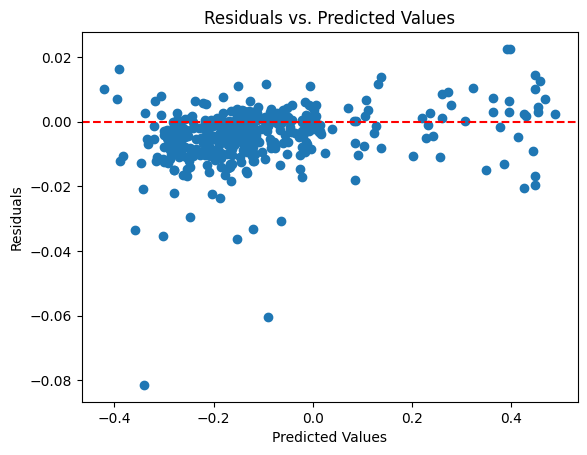

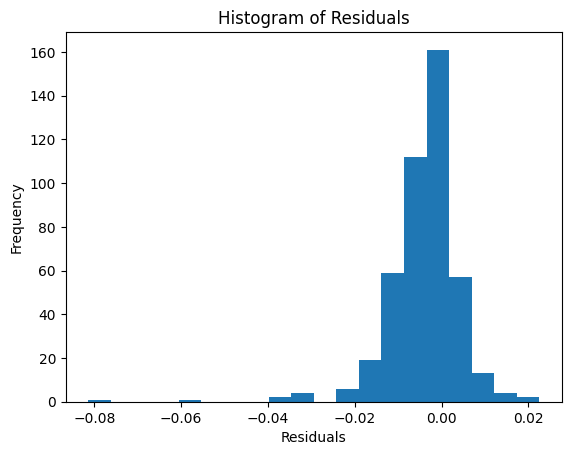

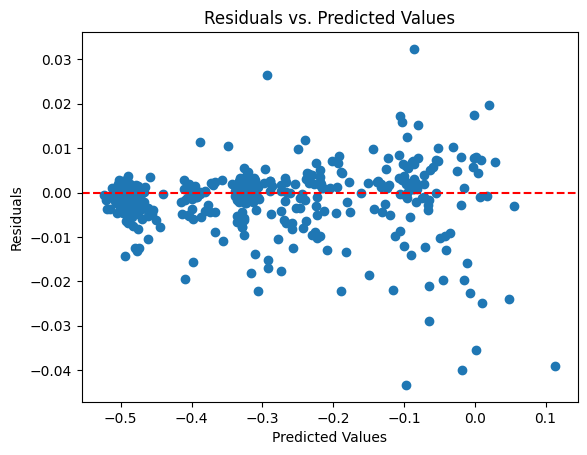

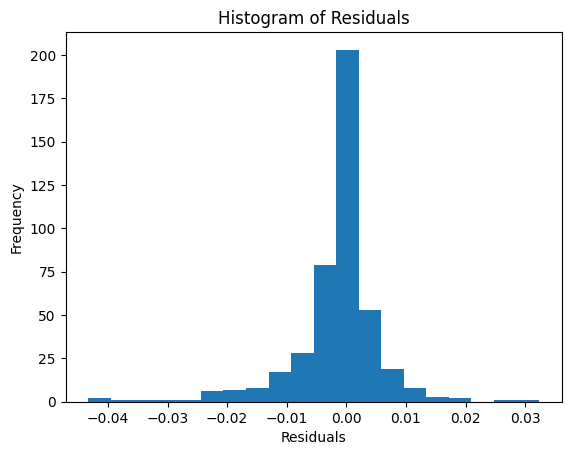

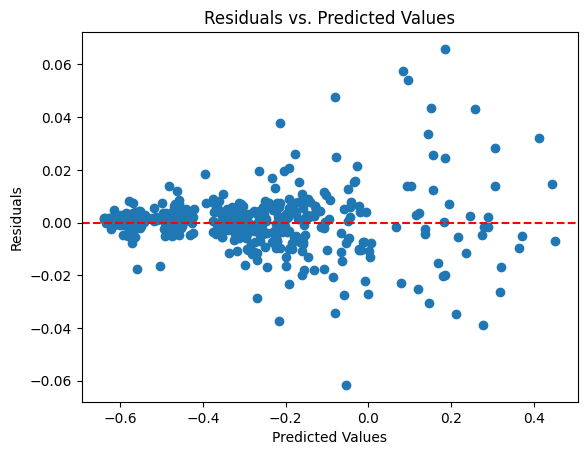

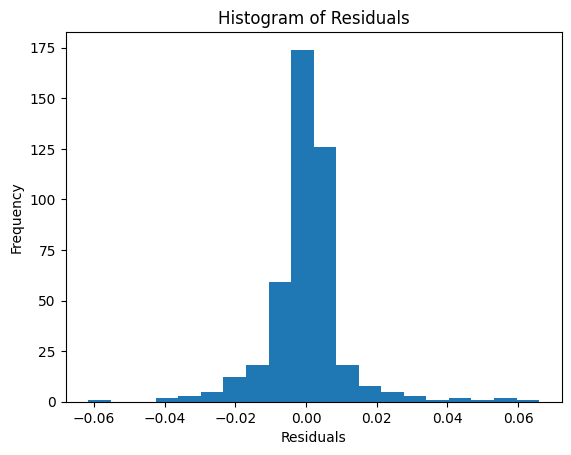

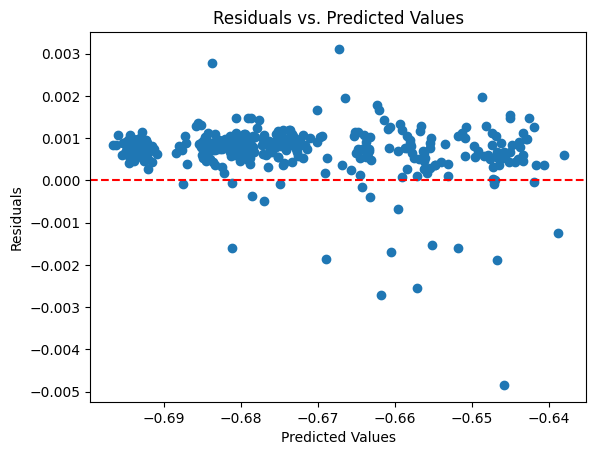

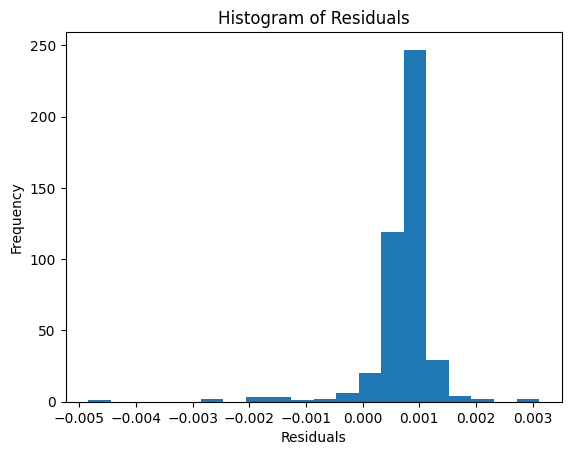

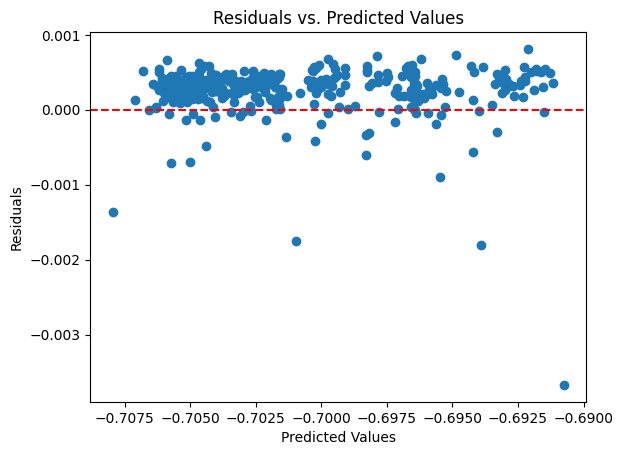

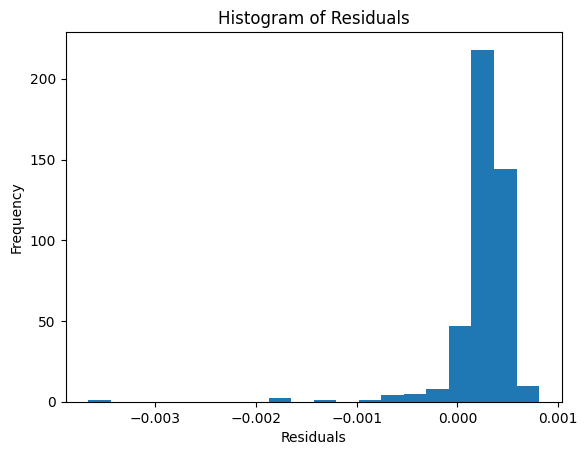

RMSE Scores: [0.009471458354637204, 0.007593517367813818, 0.011411414506944348, 0.0009231907593831733, 0.0004153638996663776]
Average RMSE: 0.005962988977688983
MAE Scores: [0.009471458354637204, 0.007593517367813818, 0.011411414506944348, 0.0009231907593831733, 0.0004153638996663776]
Average MAE: 0.005962988977688983
MAPE Scores: [0.009471458354637204, 0.007593517367813818, 0.011411414506944348, 0.0009231907593831733, 0.0004153638996663776]
Average MAPE: 0.005962988977688983
Accuracies: [0.9971292172397215, 0.9976867182904904, 0.9977357799610084, 0.9964211476031359, 0.9902831094626735]
Average Accuracy: 0.9958511945114059


In [17]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import time

X = df[["NumericalDate", "Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]

# Instantiate the TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)




rmse_scores = []

mae_scores = []

mape_scores = []

acc = []

# Perform time series cross-validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lr = LinearRegression()
    
    # Fit the model
    lr.fit(X_train, y_train)
    
    # Predict
    y_pred = lr.predict(X_test)
    
   
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
   
    rmse_scores.append(rmse)
    
    mae = np.mean(np.abs(y_pred - y_test))
    
    mae_scores.append(rmse)
    
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    mape_scores.append(rmse)
    
    r2 = r2_score(y_test, y_pred)
    
    acc.append(r2)
    
    #Residual
    residuals = y_test - y_pred
    
    # Plot residuals vs. predicted values
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Predicted Values')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()
    
    # Plot histogram of residuals
    plt.hist(residuals, bins=20)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Histogram of Residuals')
    plt.show()


    time.sleep(2)
average_rmse = np.mean(rmse_scores)
average_mae = np.mean(mae_scores)
average_mape = np.mean(mape_scores)
average_acc = np.mean(acc)

print("RMSE Scores:", rmse_scores)
print("Average RMSE:", average_rmse)
print("MAE Scores:", mae_scores)
print("Average MAE:", average_mae)
print("MAPE Scores:", mape_scores)
print("Average MAPE:", average_mape)
print("Accuracies:", acc)
print("Average Accuracy:", average_acc)


Some Graphs have randomness which indicated residuals are independent of predicted value which is a good characteristic of linear regression models but some graphs dont show randomness which indicated potential issue with homoscedasticity, which means the variance of errors might not be constant across the data.

## Non Linear Model with its Evaluation, Cross Validation and Residual

I will be using Polynomial Regression Model becauase becuase bitcoin often exhibits non-linear behavoiur by including polynomial features, we can capture these non-linear patterns more effectively than with linear models.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

X = df[["NumericalDate", "Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


degree = 2

# Apply non-linear transformations or create polynomial features
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_poly)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - y_pred))

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


#Evaluation

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")
print("Accuracy:", r2)

R-squared (R2) score: 0.9996061744838581
Root Mean Squared Error (RMSE): 0.019232828103538397
Mean Absolute Error (MAE): 0.008066163874351072
Mean Absolute Percentage Error (MAPE): 4.365267940963834 %
Accuracy: 0.9996061744838581


Root Mean Squared Error (RMSE):
RMSE measures the average deviation between the predicted values and the actual values, considering both the magnitude and direction of errors.
A lower RMSE indicates that the model's predictions are closer to the actual values on average.
In this case, the RMSE of approximately 0.0192 suggests that, on average, the model's predictions deviate from the actual Bitcoin prices by approximately 0.0192 in standardized units.
Mean Absolute Error (MAE):
MAE provides the average absolute deviation between the predicted values and the actual values.
It measures the average magnitude of errors without considering their direction.
A lower MAE indicates that the model's predictions are closer to the actual values on average.
In this case, the MAE of approximately 0.0081 suggests that, on average, the model's predictions deviate from the actual Bitcoin prices by approximately 0.0081 in standardized units.
Mean Absolute Percentage Error (MAPE):
MAPE calculates the average percentage difference between the predicted values and the actual values relative to the actual values.
It measures the average relative accuracy of the predictions.
A lower MAPE indicates that the model's predictions are closer to the actual values on average, relative to the actual values.
In this case, the MAPE of approximately 4.51% suggests that, on average, the model's predictions deviate from the actual Bitcoin prices by approximately 4.51% of the actual values.

Plotting Actual vs Predicted

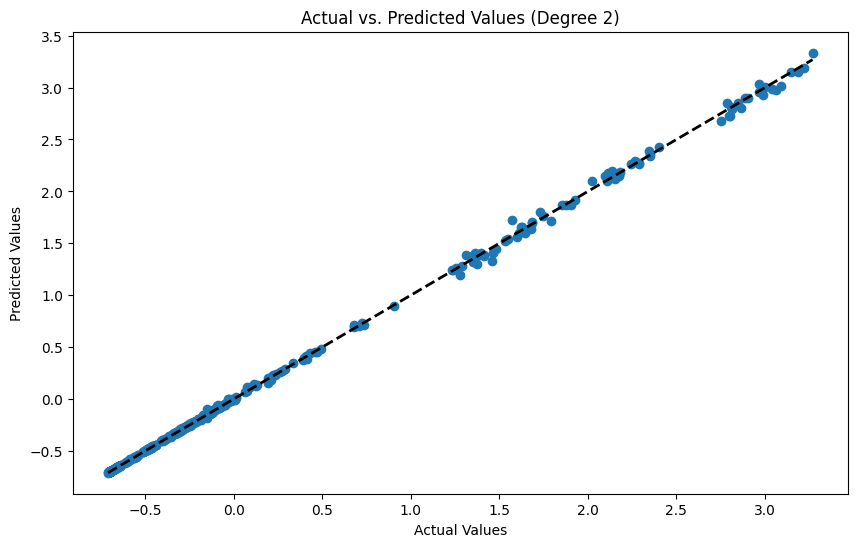

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs. Predicted Values (Degree {degree})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


Cross Validation and Residual

Polynomial Regression with Degree 1
R-squared (R2) score: 0.9971292172397221


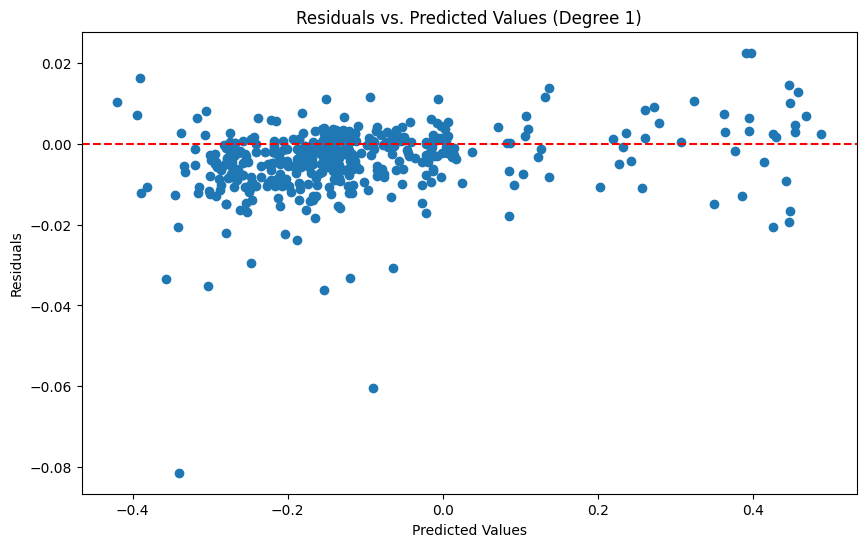

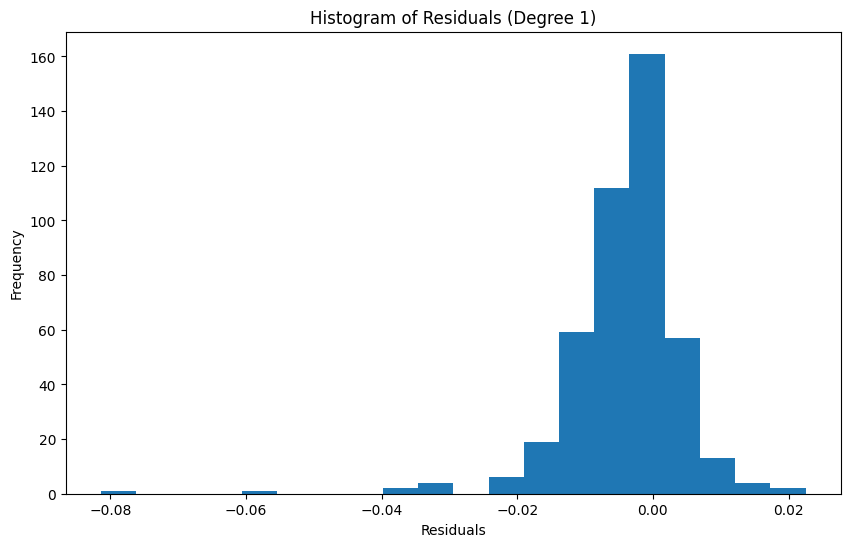

R-squared (R2) score: 0.9976867182904904


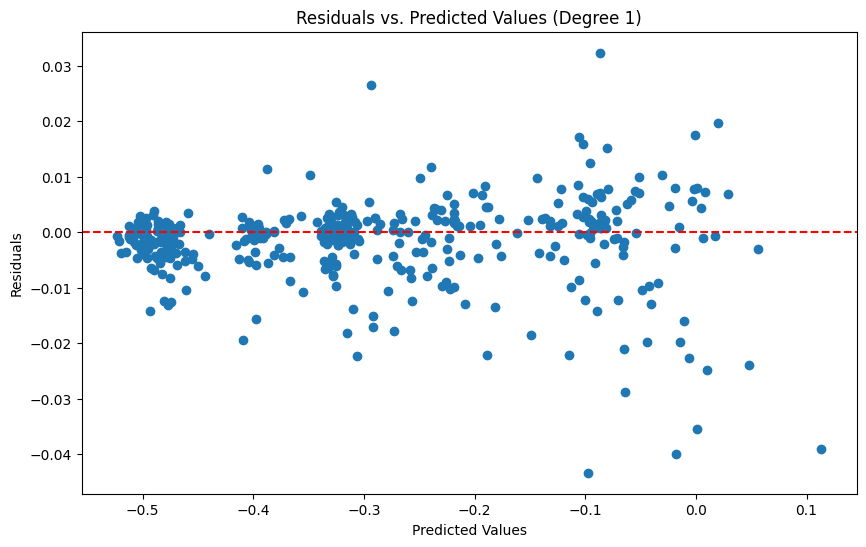

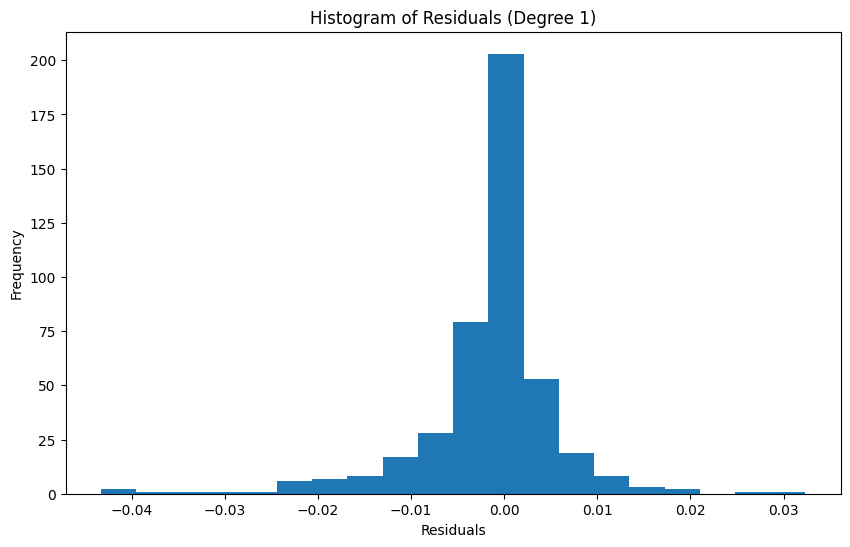

R-squared (R2) score: 0.9977357799610084


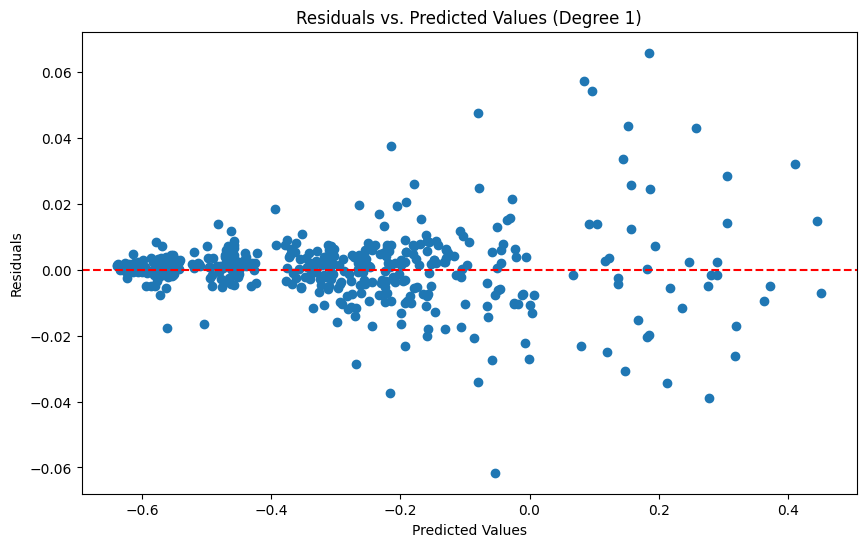

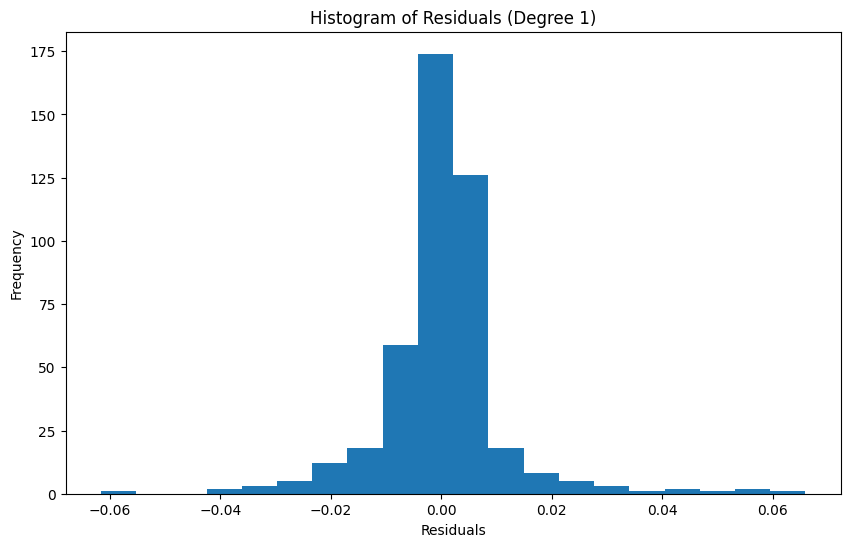

R-squared (R2) score: 0.9964211476031343


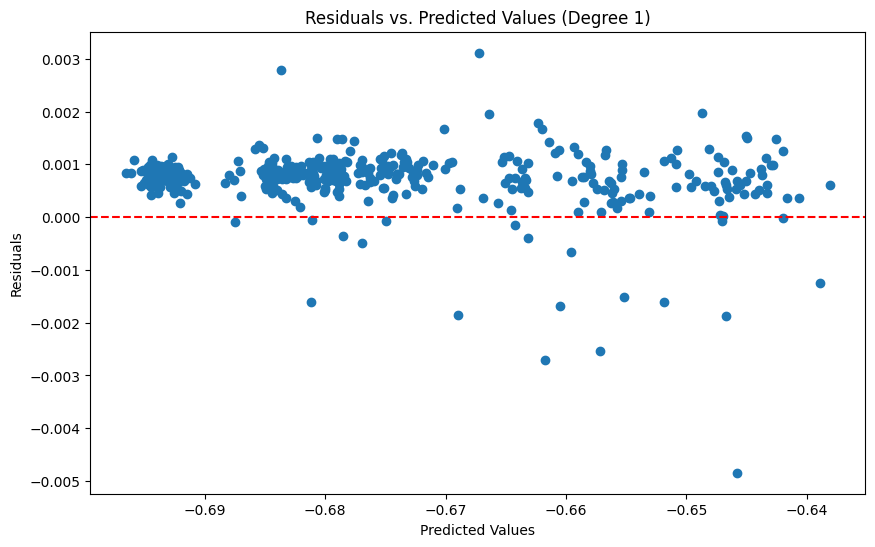

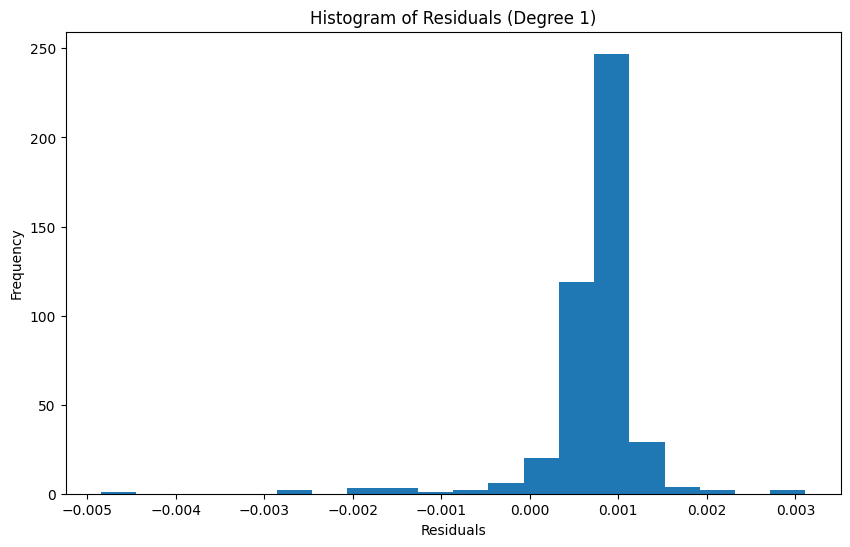

R-squared (R2) score: 0.9902831094626183


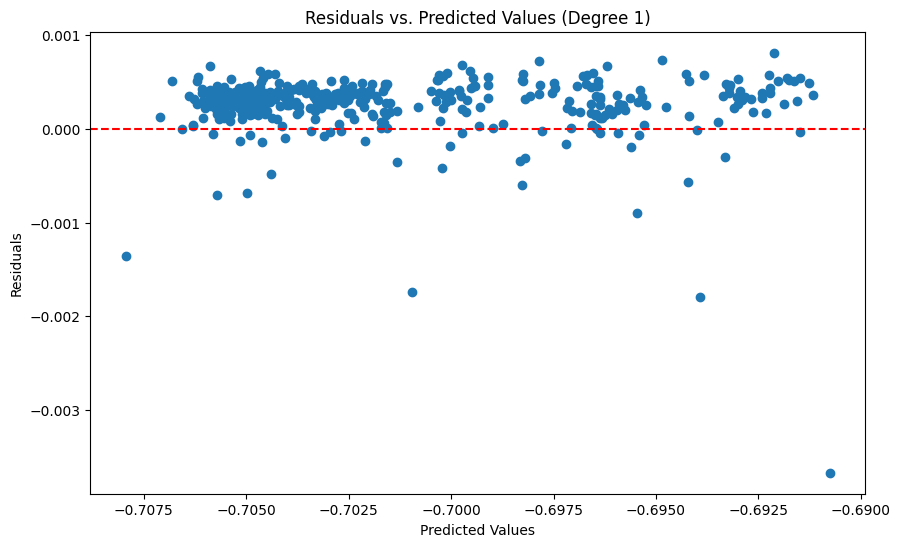

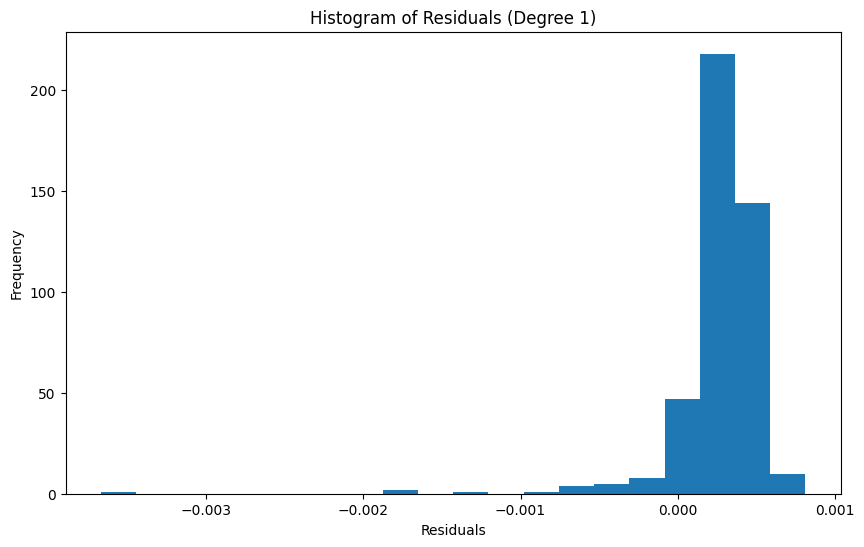

Polynomial Regression with Degree 2
R-squared (R2) score: 0.9968458957172235


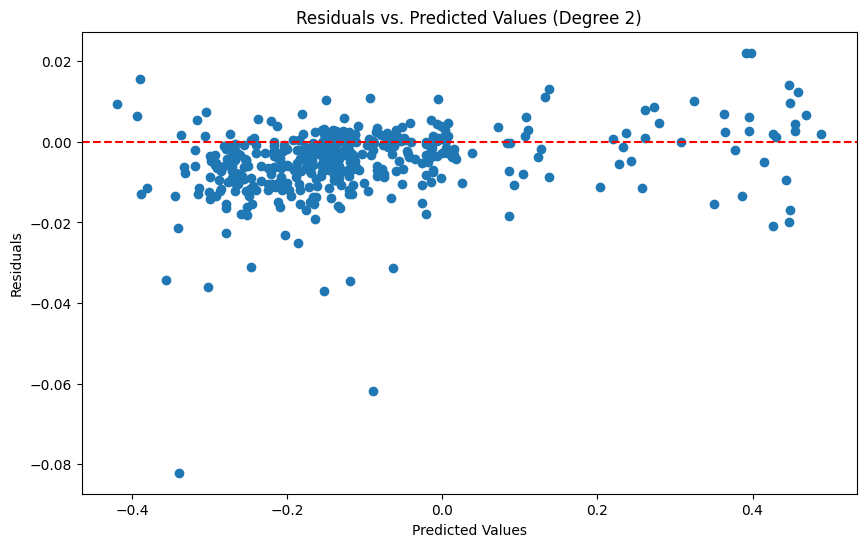

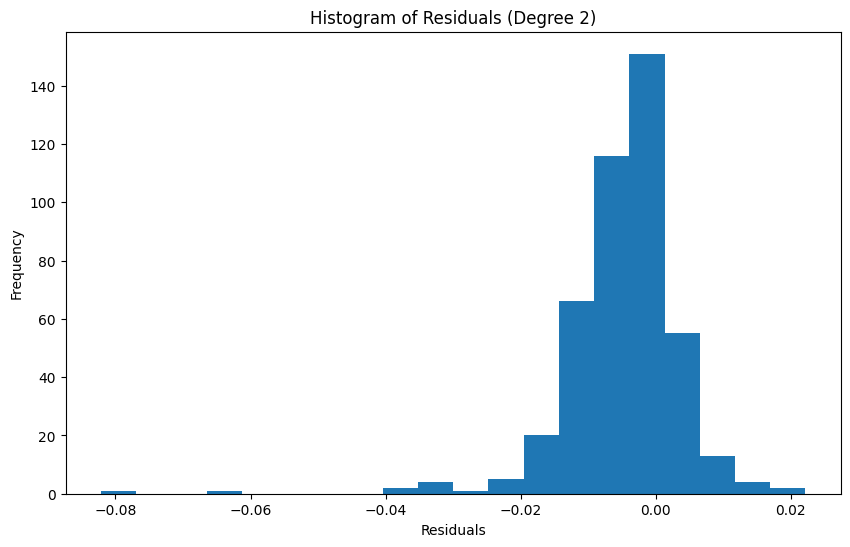

R-squared (R2) score: 0.9975902367997211


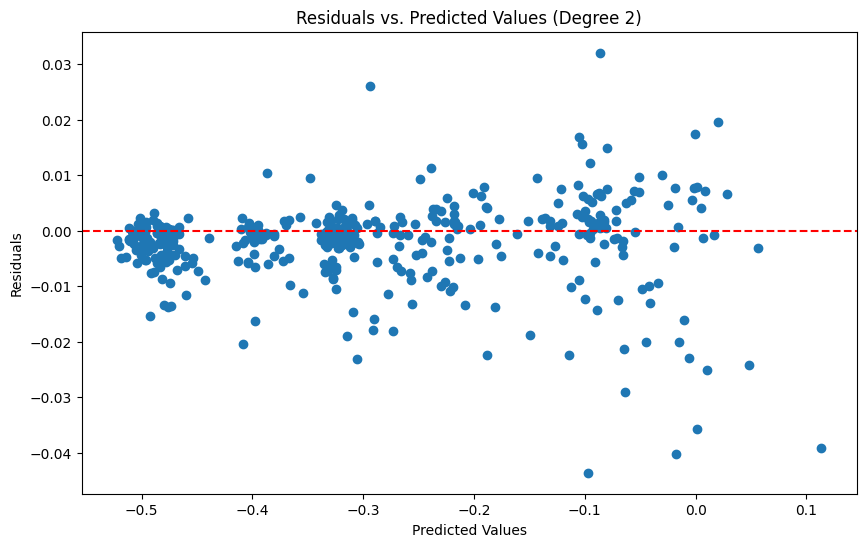

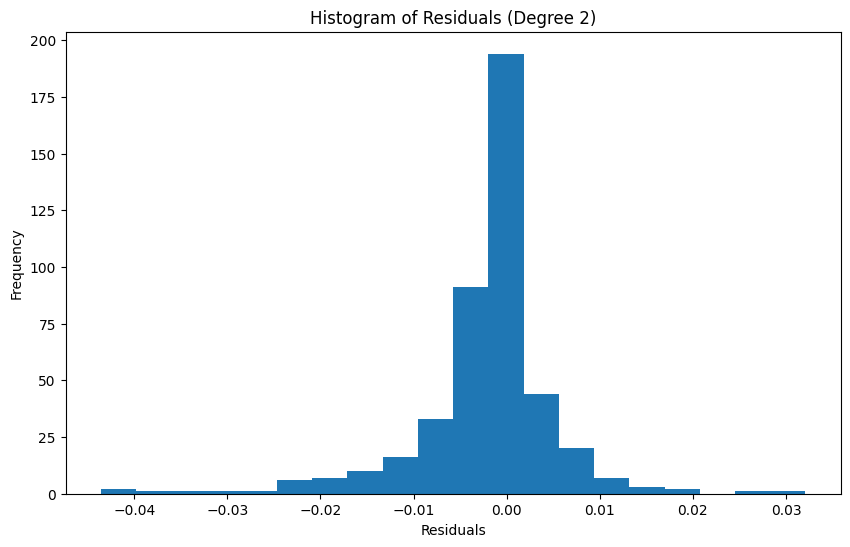

R-squared (R2) score: 0.9977308009966278


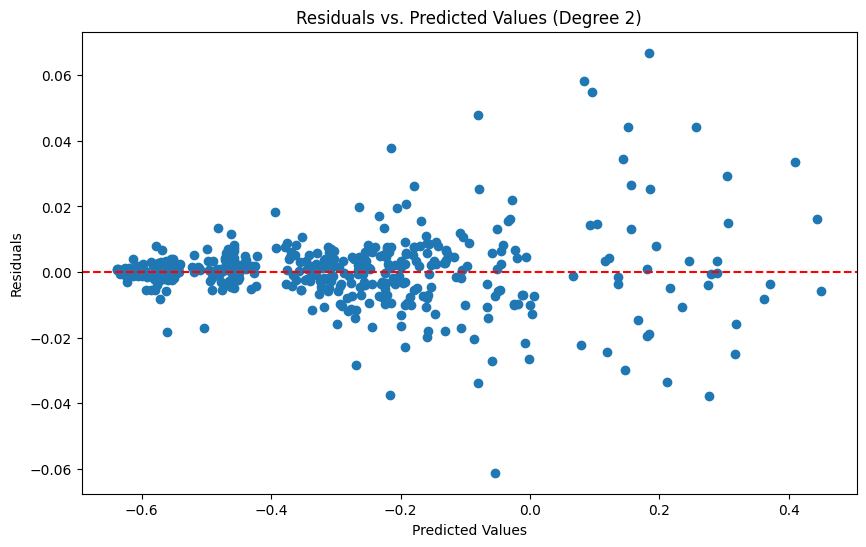

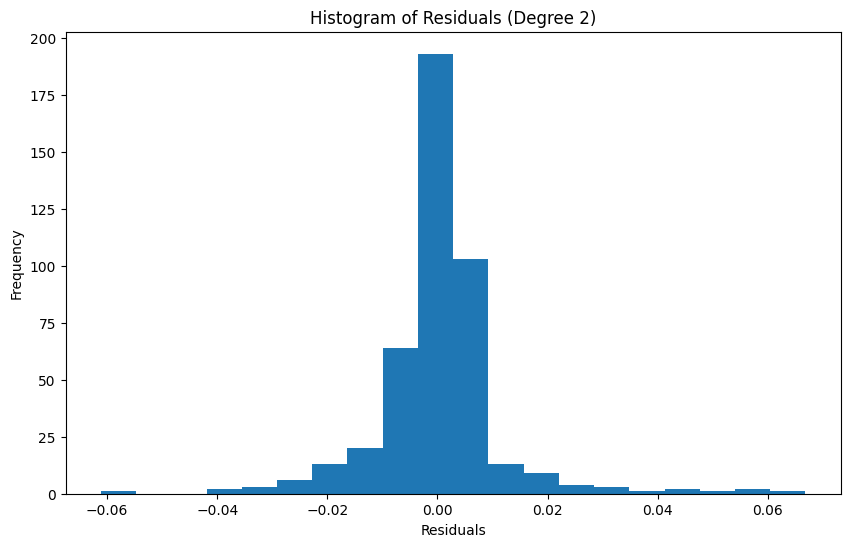

R-squared (R2) score: 0.9986157348709774


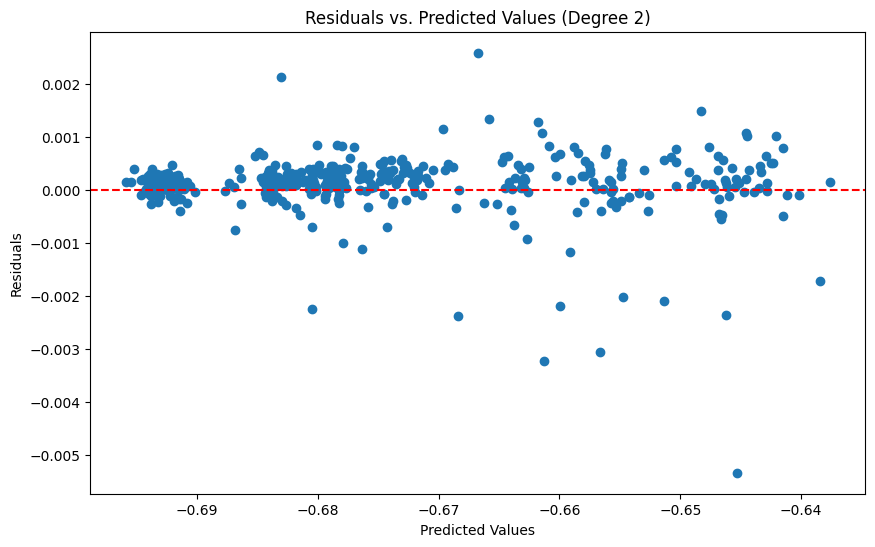

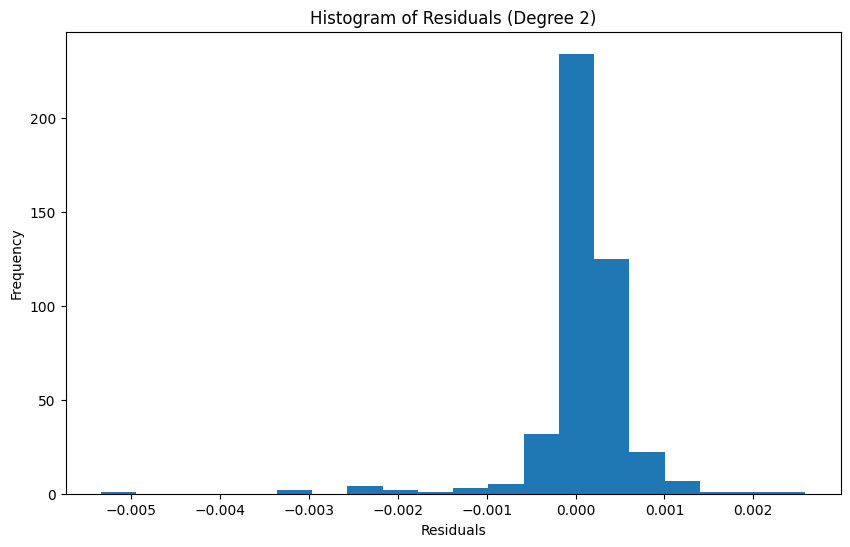

R-squared (R2) score: 0.9924071284374876


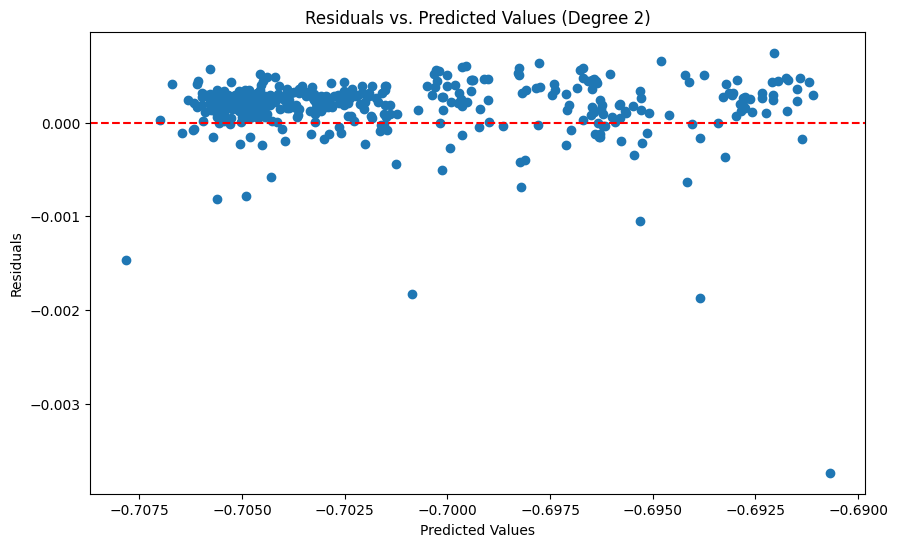

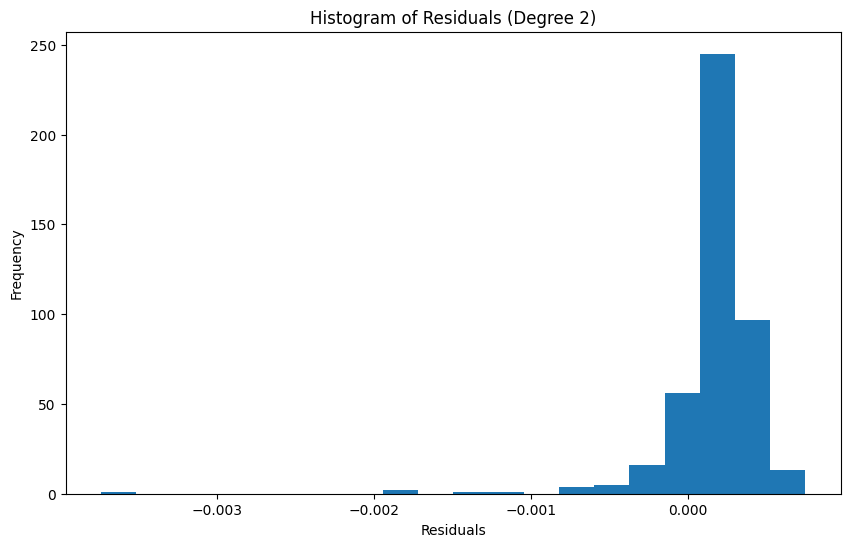

Polynomial Regression with Degree 3
R-squared (R2) score: 0.9965144395589405


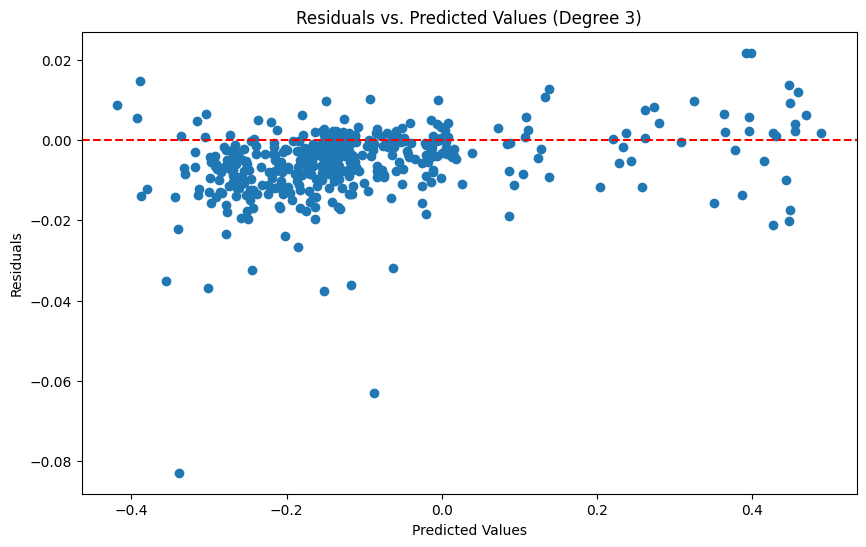

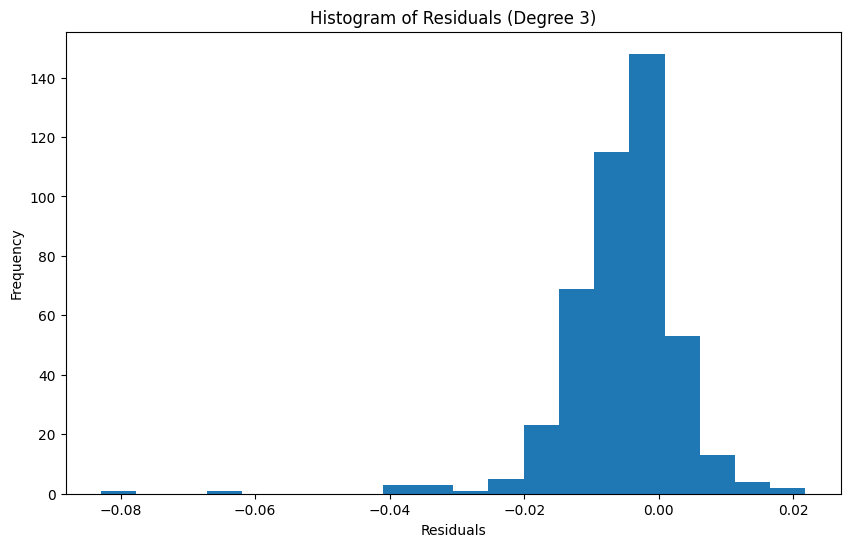

R-squared (R2) score: 0.9974585796639617


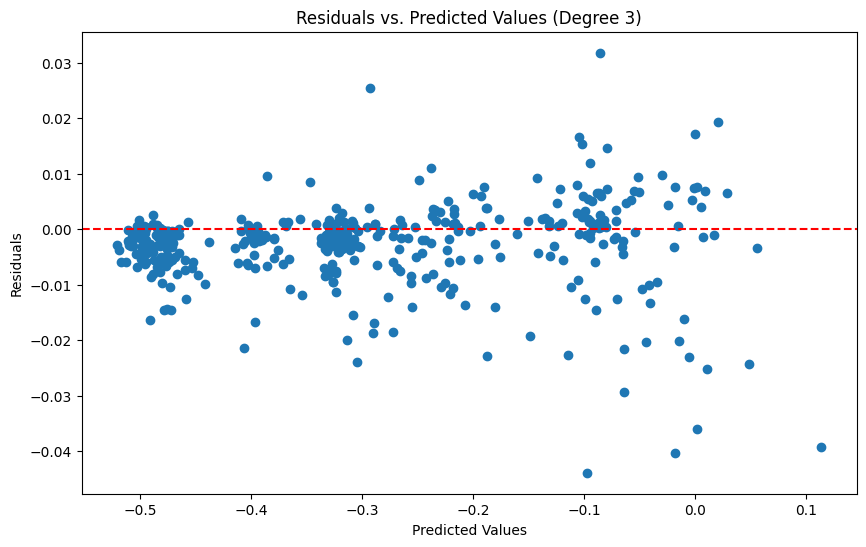

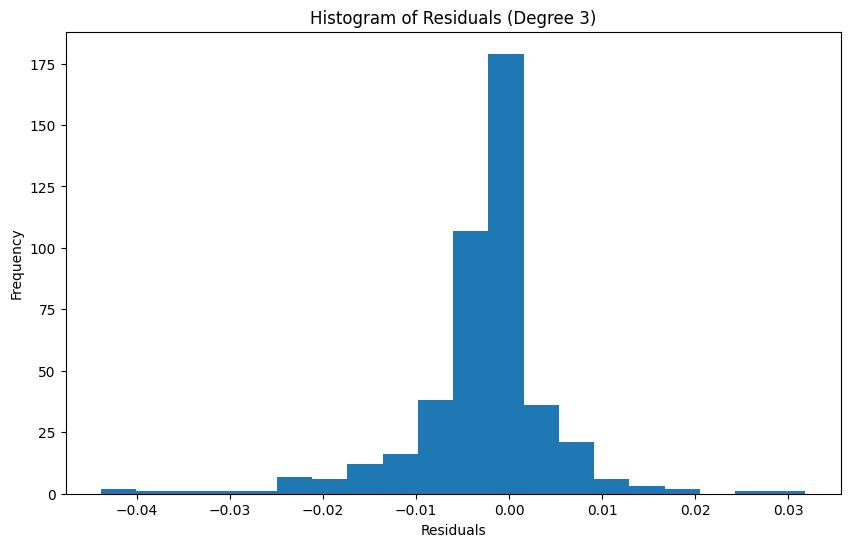

R-squared (R2) score: 0.9977193067412978


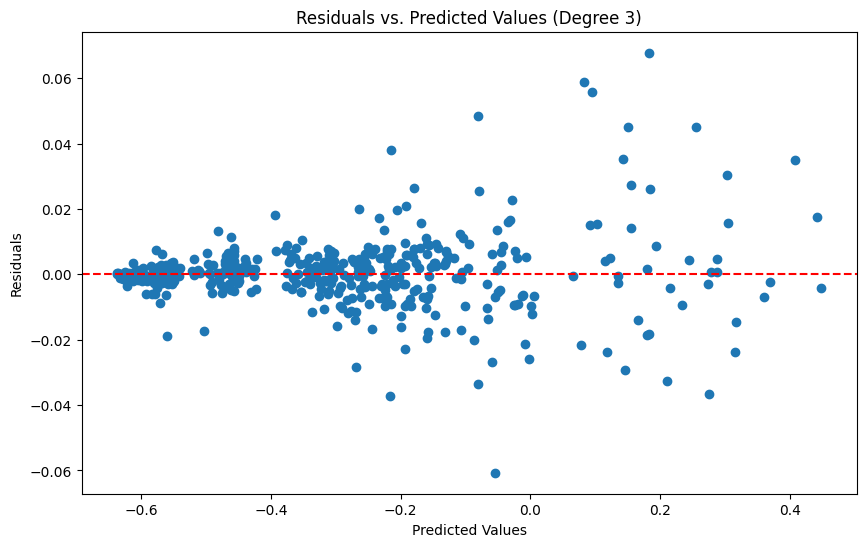

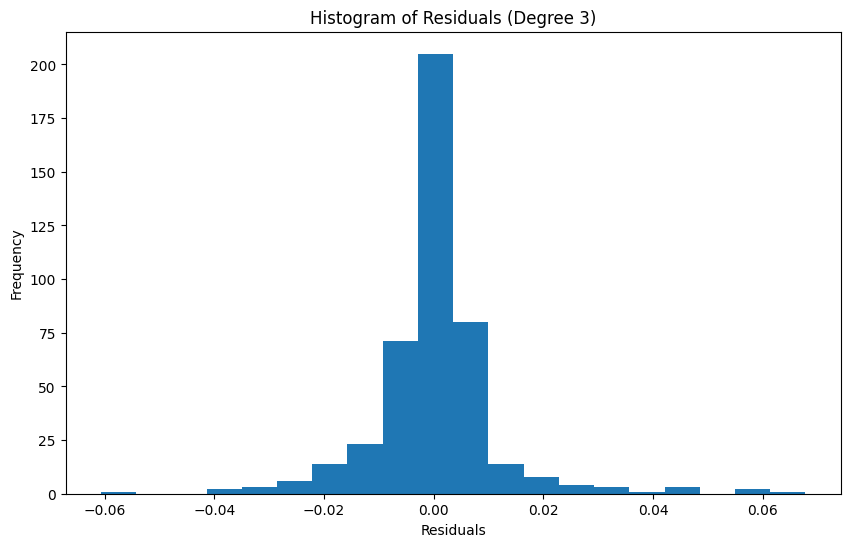

R-squared (R2) score: 0.9935969851853569


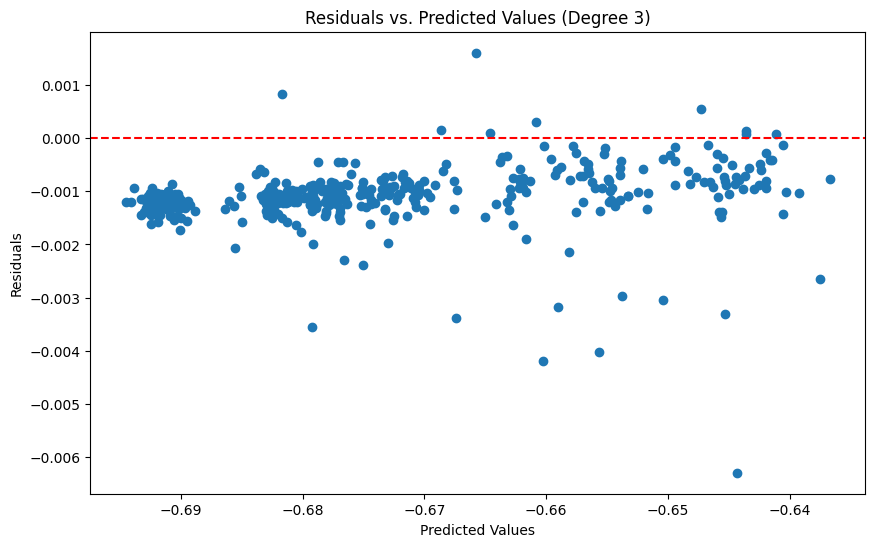

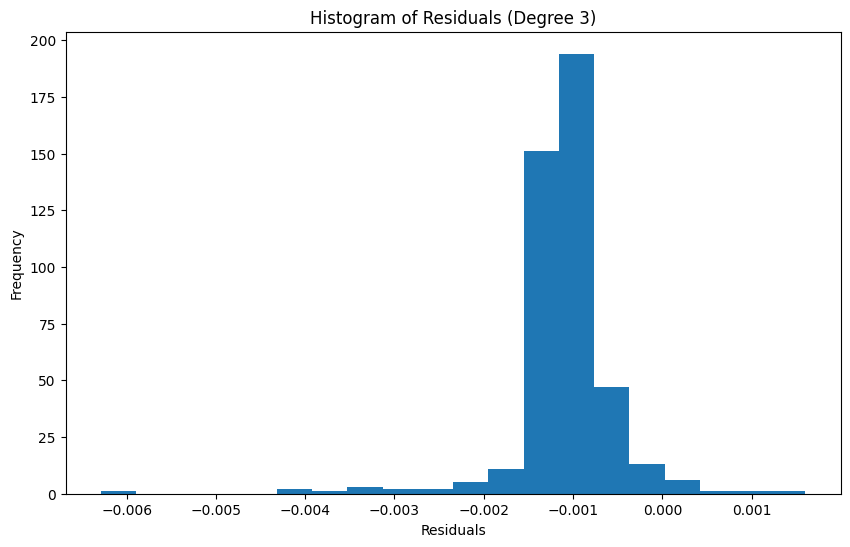

R-squared (R2) score: 0.9934488899155487


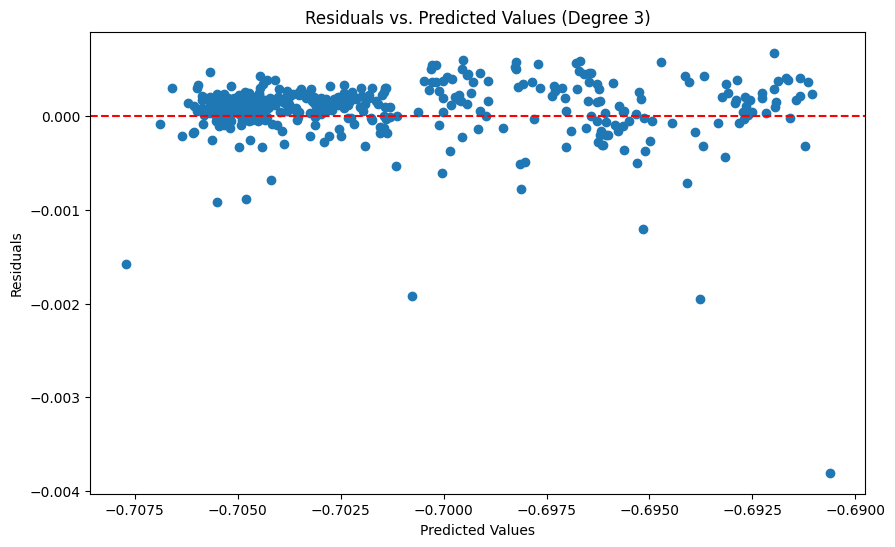

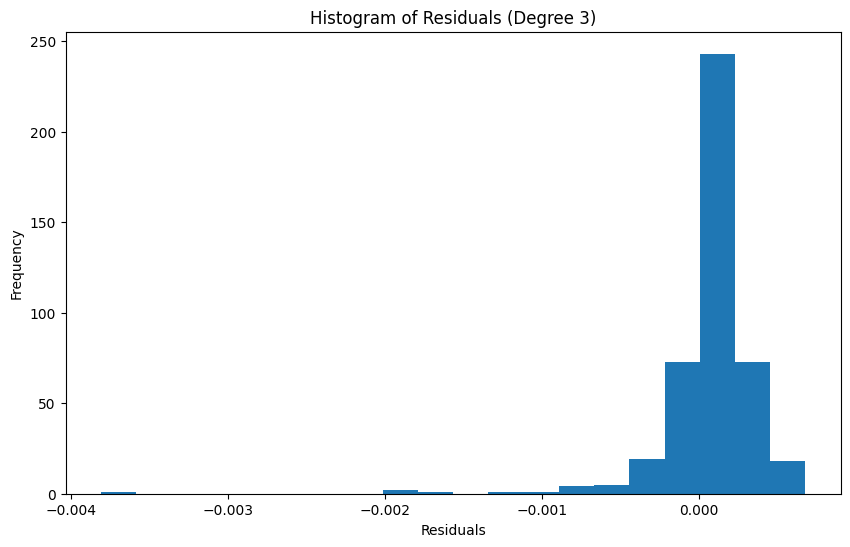

RMSE Scores: [0.009471458354636074, 0.007593517367813725, 0.011411414506944446, 0.0009231907593833965, 0.00041536389966755706, 0.00992783872003705, 0.00775025358310977, 0.01142395432747123, 0.0005741550573852826, 0.00036717078654073933, 0.010436454841723649, 0.00795915530327653, 0.011452850864400798, 0.0012348431830905766, 0.0003410535243010745]
Average RMSE: 0.0060855116719854595
MAE Scores: [0.006139686797482436, 0.004485380722281968, 0.006831365811016364, 0.0008308238274224771, 0.00033787019793243573, 0.006620188916667683, 0.004650883988825754, 0.006788898988048022, 0.00032650840091317173, 0.0002672269815644723, 0.007157264265160744, 0.004955341752345184, 0.006777071002148739, 0.0011136647627679886, 0.00021267541145919327]
Average MAE: 0.003832990121735775
MAPE Scores: [23.19382041190094, 5.883142364294129, 8.140636281712899, 0.12318179108120114, 0.048196089019742656, 17.696864286097497, 5.8878966028056166, 8.129094771683242, 0.048854564877107556, 0.038134645349016214, 12.3286743936

In [20]:
X = df[["NumericalDate", "Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]

# Instantiate the TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Define the maximum degree of the polynomial features
max_degree = 3

rmse_scores = []
mae_scores = []
mape_scores = []
acc = []

for degree in range(1, max_degree + 1):
    print(f"Polynomial Regression with Degree {degree}")
    
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Apply polynomial transformation
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)
        
        # Fit the model
        lr = LinearRegression()
        lr.fit(X_train_poly, y_train)
        
        # Predict
        y_pred = lr.predict(X_test_poly)
        
        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
        
        mae = np.mean(np.abs(y_pred - y_test))
        mae_scores.append(mae)
        
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        mape_scores.append(mape)
        
        r2 = r2_score(y_test, y_pred)
        print("R-squared (R2) score:", r2)
        
        acc.append(r2)
        
        # Calculate residuals
        residuals = y_test - y_pred
        
        # Plot residuals vs. predicted values
        plt.figure(figsize=(10, 6))
        plt.scatter(y_pred, residuals)
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.title(f'Residuals vs. Predicted Values (Degree {degree})')
        plt.axhline(y=0, color='r', linestyle='--')
        plt.show()
        
        # Plot histogram of residuals
        plt.figure(figsize=(10, 6))
        plt.hist(residuals, bins=20)
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title(f'Histogram of Residuals (Degree {degree})')
        plt.show()

        

# Calculate average scores
average_rmse = np.mean(rmse_scores)
average_mae = np.mean(mae_scores)
average_mape = np.mean(mape_scores)
average_acc = np.mean(acc)

print("RMSE Scores:", rmse_scores)
print("Average RMSE:", average_rmse)
print("MAE Scores:", mae_scores)
print("Average MAE:", average_mae)
print("MAPE Scores:", mape_scores)
print("Average MAPE:", average_mape)
print("Accuracies:", acc)
print("Average Accuracy:", average_acc)

Degree of Polynomial 2 is the best choice for this dataset has it exhibits less errors

Some Graphs have randomness which indicated residuals are independent of predicted value which is a good characteristic of linear regression models but some graphs dont show randomness which indicated potential issue with homoscedasticity, which means the variance of errors might not be constant across the data.

## ARIMA Model with Evaluation, Cross Validation and Residual

Check for stationary and do the difference if needed

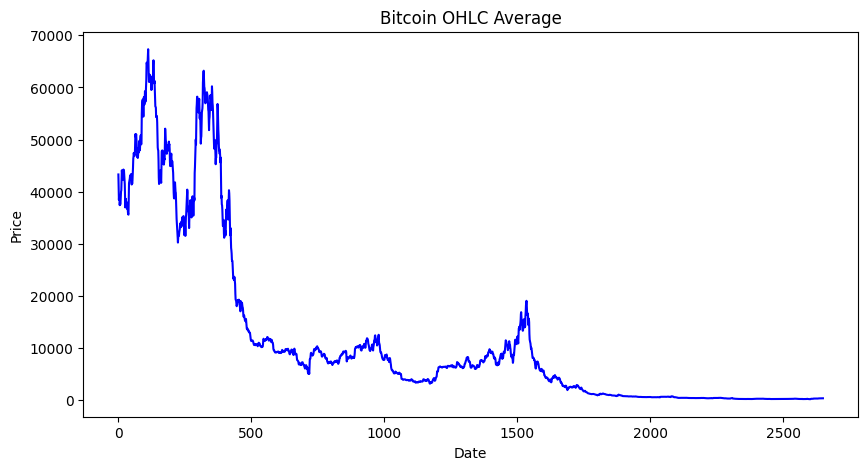

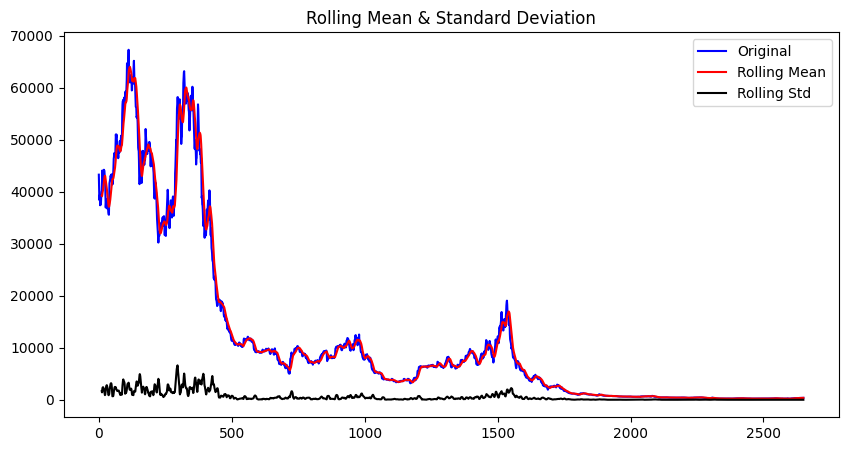

Results of Dickey-Fuller Test:
Test Statistic                   -1.874501
p-value                           0.344150
#Lags Used                       27.000000
Number of Observations Used    2623.000000
Critical Value (1%)              -3.432846
Critical Value (5%)              -2.862643
Critical Value (10%)             -2.567357
dtype: float64


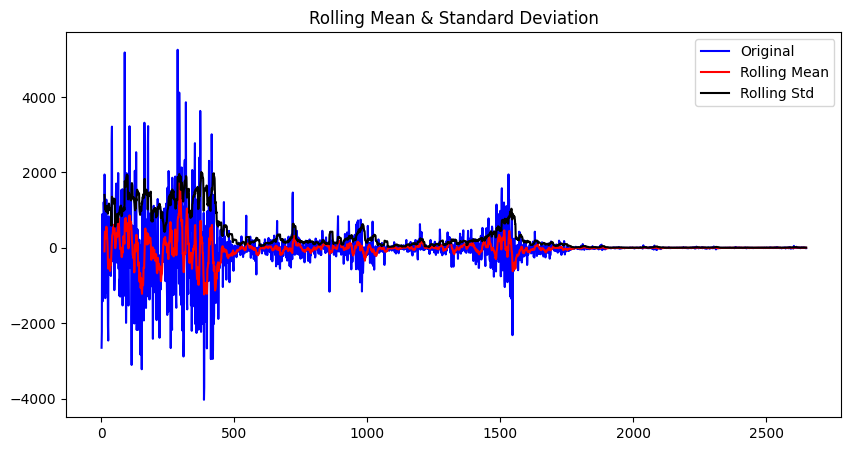

Results of Dickey-Fuller Test:
Test Statistic                -8.575347e+00
p-value                        7.990988e-14
#Lags Used                     2.800000e+01
Number of Observations Used    2.621000e+03
Critical Value (1%)           -3.432847e+00
Critical Value (5%)           -2.862643e+00
Critical Value (10%)          -2.567357e+00
dtype: float64


In [23]:
from statsmodels.tsa.stattools import adfuller

bitcoin_combined = df[['open', 'high', 'low', 'close']].mean(axis=1)  # Taking the average for simplicity

# Visual inspection
plt.figure(figsize=(10, 5))
plt.plot(bitcoin_combined, color='blue')
plt.title('Bitcoin OHLC Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Define a function to test for stationarity
def test_stationarity(timeseries):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    plt.figure(figsize=(10, 5))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    adftest = adfuller(timeseries, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    print(adfoutput)

# Perform stationarity test
test_stationarity(bitcoin_combined)

# Perform differencing if needed
bitcoin_combined_diff = bitcoin_combined.diff().dropna()

# Re-run the stationarity test after differencing
test_stationarity(bitcoin_combined_diff)

Determine p and q

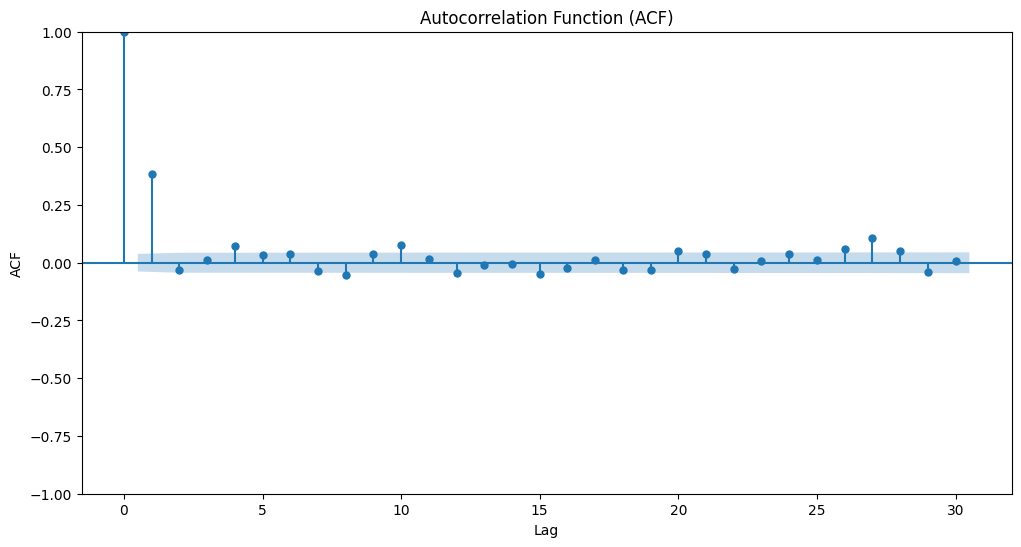

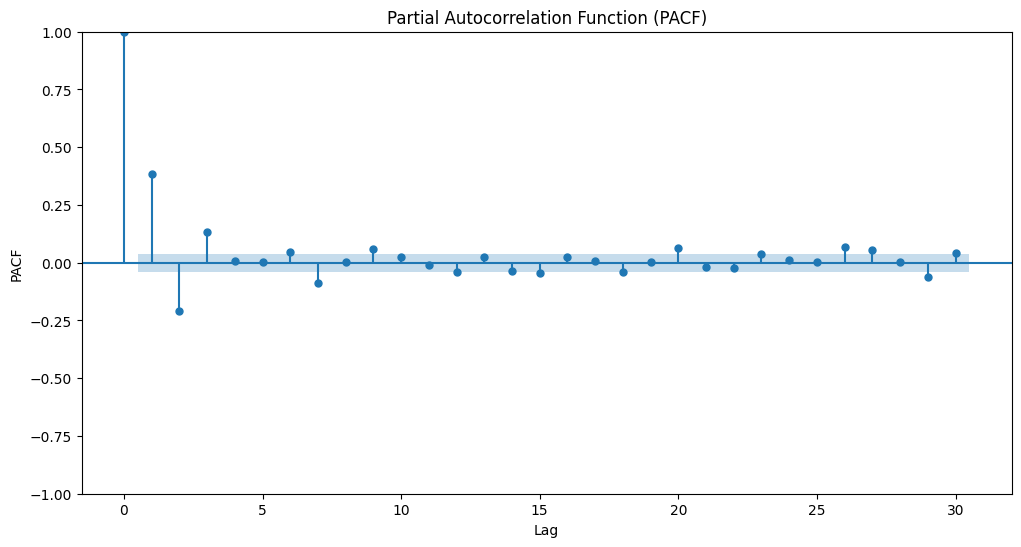

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(bitcoin_combined_diff, lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(bitcoin_combined_diff, lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()


In [28]:
#Determined by checking the PACF plot where the value passes the upper confidence level
p = [1, 4, 8, 10, 12, 15 ,20, 26, 27, 28]

#Determined by checking the ACF plot where the value passes the upper confidence level
q = [1, 2, 3, 6, 7, 9, 12, 14, 15, 18, 20, 23, 26, 27, 29]

#Value of d depends on the number of differences you take to make the data stationary and in this case
d = 1 

Fitting ARIMA model

In [40]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(bitcoin_combined_diff, order=(p[0], d, q[0]))
fitted_model = model.fit()


print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2650
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -20436.413
Date:                Tue, 30 Apr 2024   AIC                          40878.826
Time:                        19:00:17   BIC                          40896.472
Sample:                             0   HQIC                         40885.213
                               - 2650                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3860      0.008     46.163      0.000       0.370       0.402
ma.L1         -1.0000      0.188     -5.316      0.000      -1.369      -0.631
sigma2      2.936e+05   5.51e+04      5.333      0.0

Cross Validation and Residual

ARIMA Model (p=1, q=1): Average RMSE = 21.926704760436525, Average MAE = 20.776927488908516, Average MAPE = 196328929921.6307


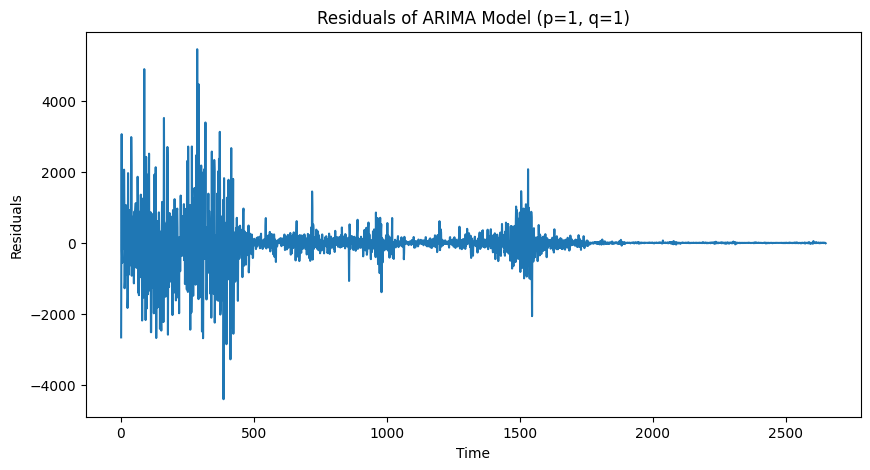

ARIMA Model (p=1, q=2): Average RMSE = 21.59539423661527, Average MAE = 20.430458836200692, Average MAPE = 192901278084.7706


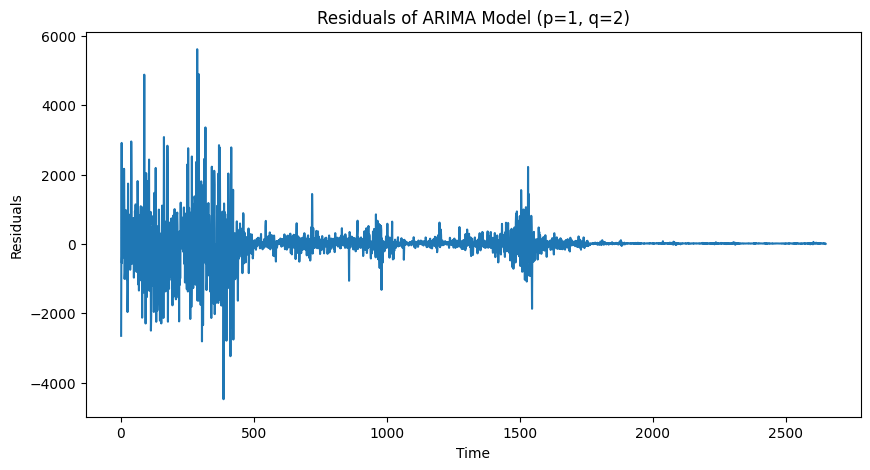

ARIMA Model (p=1, q=3): Average RMSE = 21.588491485348495, Average MAE = 20.423169209967508, Average MAPE = 192833364319.4305


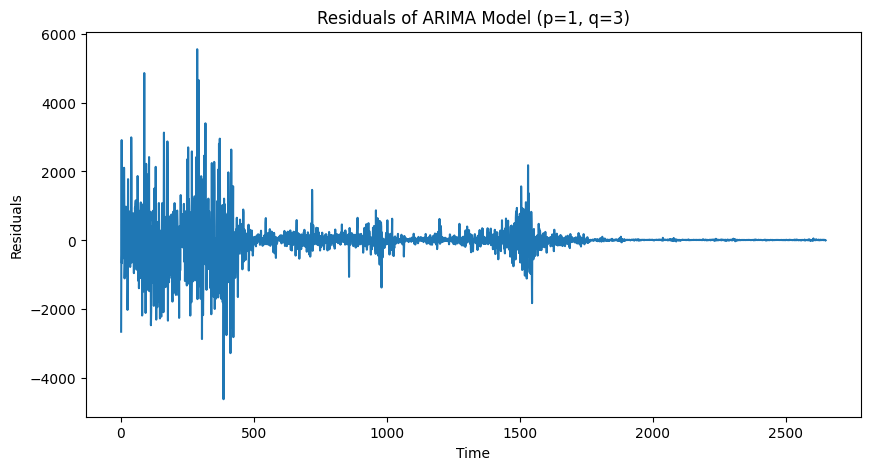

ARIMA Model (p=1, q=6): Average RMSE = 22.070644657717946, Average MAE = 20.418334649986253, Average MAPE = 188581105646.39435


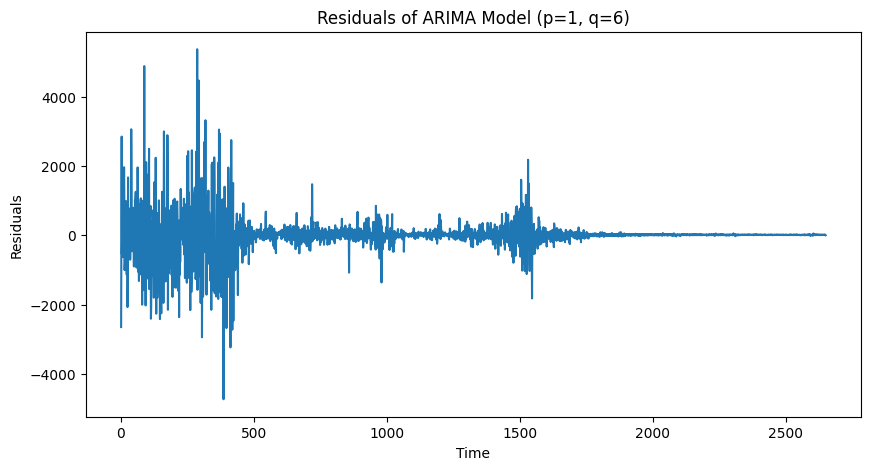

ARIMA Model (p=1, q=7): Average RMSE = 21.645759314660125, Average MAE = 20.421094715597743, Average MAPE = 192742707473.91003


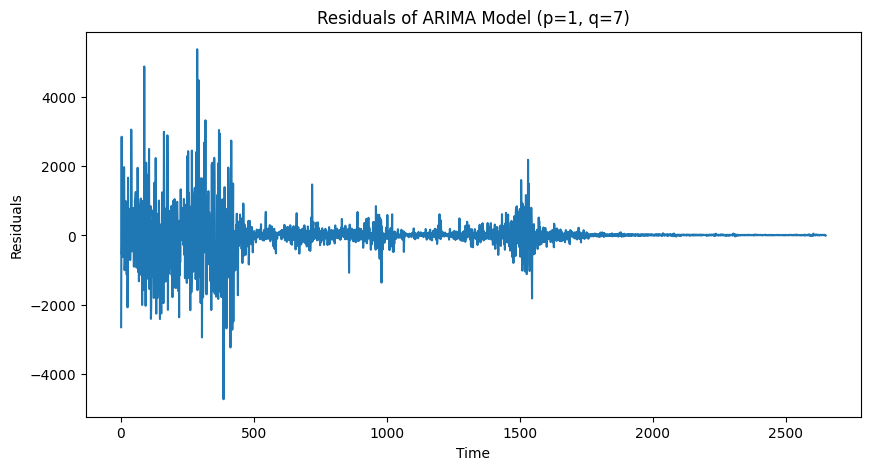

ARIMA Model (p=1, q=9): Average RMSE = 15.186092025409943, Average MAE = 13.62774593154596, Average MAPE = 126370472757.75851


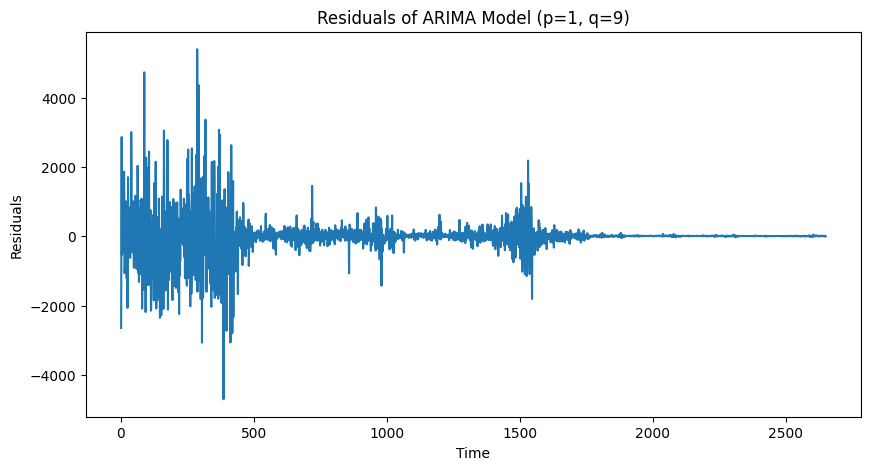

ARIMA Model (p=1, q=12): Average RMSE = 19.204044839769793, Average MAE = 17.915920316330354, Average MAPE = 168853664934.15308


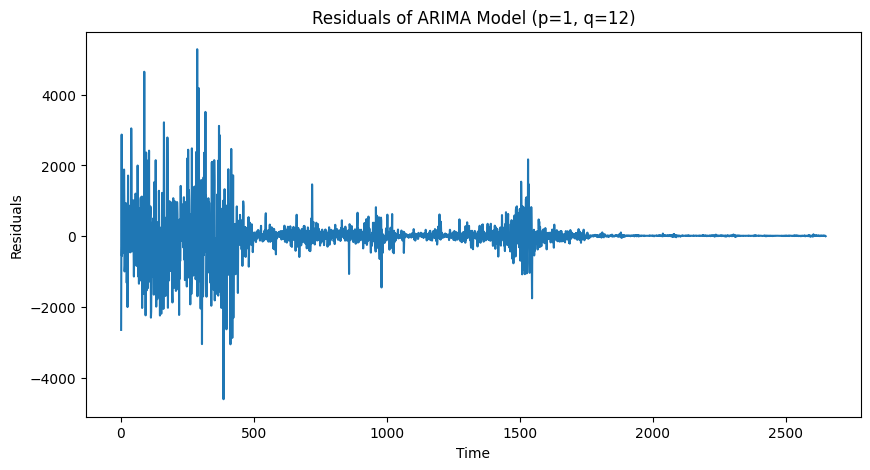

ARIMA Model (p=1, q=14): Average RMSE = 21.268298283455252, Average MAE = 20.087807629118387, Average MAPE = 189732511287.1939


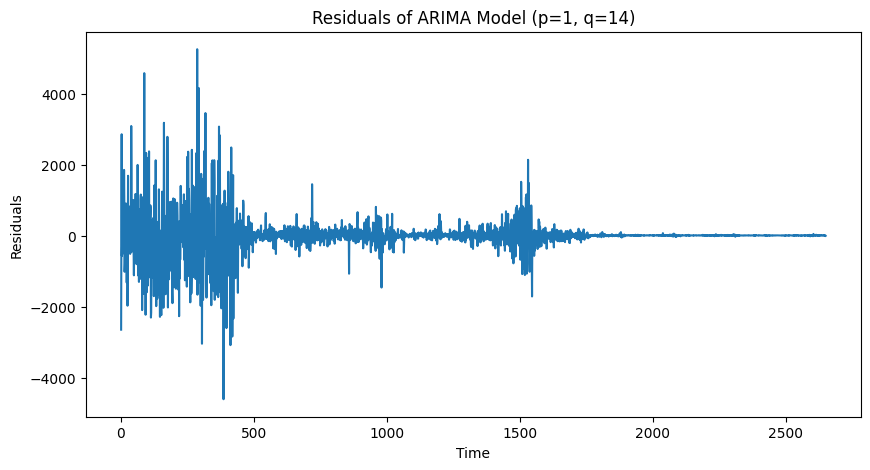

ARIMA Model (p=1, q=15): Average RMSE = 18.592984223869202, Average MAE = 17.27151322033289, Average MAPE = 162500519022.63876


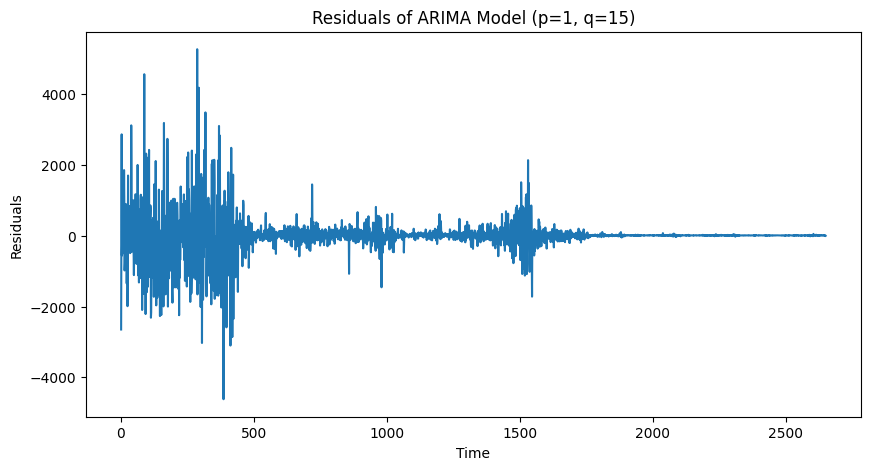

ARIMA Model (p=1, q=18): Average RMSE = 21.748932103785254, Average MAE = 20.543286346971318, Average MAPE = 193818134130.63983


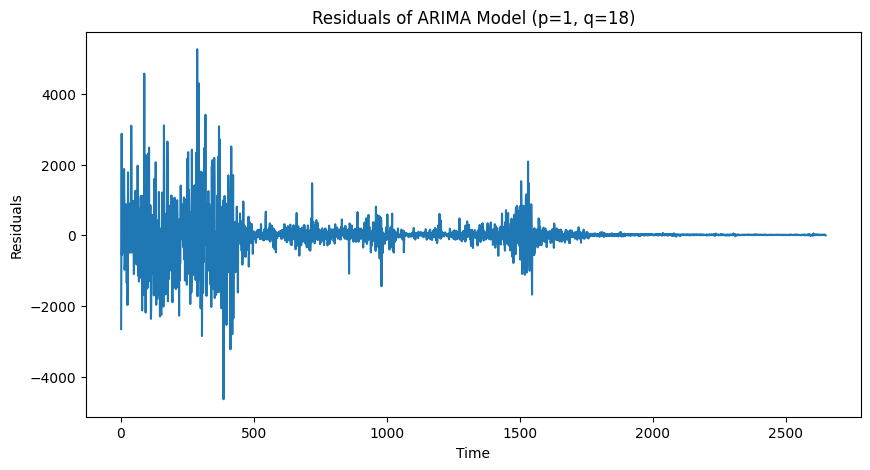

ARIMA Model (p=1, q=20): Average RMSE = 21.746161215112604, Average MAE = 20.543133830930643, Average MAPE = 193849738988.2931


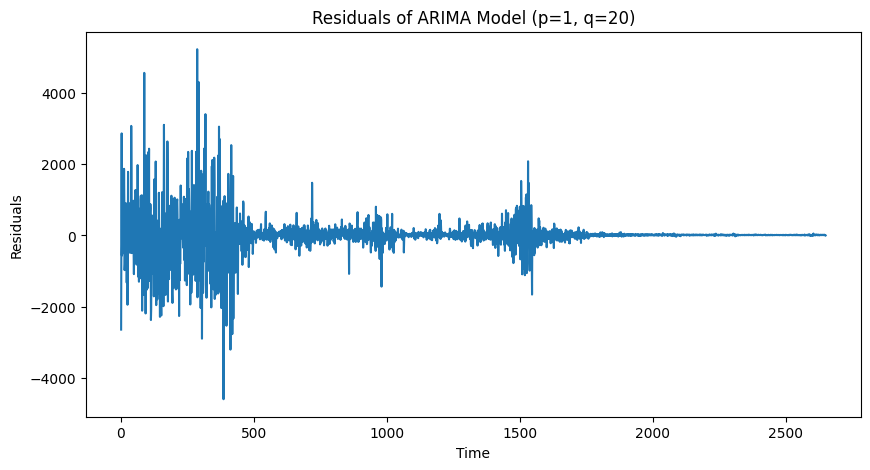

ARIMA Model (p=1, q=23): Average RMSE = 21.571463083804957, Average MAE = 20.40306508030691, Average MAPE = 192840984300.98352


KeyboardInterrupt: 

In [41]:
n = len(bitcoin_combined_diff)
cv_splits = 5

for ps in p:
    for qs in q:
        rmse = []
        mae = []
        mape = []

        for i in range(cv_splits):
            
            train_start = 0
            train_end = int(0.8 * n)  
            test_start = train_end
            test_end = n

           
            train_data, test_data = bitcoin_combined_diff[train_start:train_end], bitcoin_combined_diff[test_start:test_end]

           
            model = ARIMA(train_data, order=(ps, 1, qs))
            fitted_model = model.fit()

            
            y_pred = fitted_model.forecast(steps=len(test_data))

            
            rmse_scores = np.sqrt(np.mean((test_data - y_pred)**2))
            mae_scores = np.mean(np.abs(test_data - y_pred))
            mape_scores = np.mean(np.abs((test_data - y_pred) / (test_data + 1e-10))) * 100 #Avoid division by zero

          
            rmse.append(rmse_scores)
            mae.append(mae_scores)
            mape.append(mape_scores)

       
        avg_rmse = np.mean(rmse)
        avg_mae = np.mean(mae)
        avg_mape = np.mean(mape)

        print(f"ARIMA Model (p={ps}, q={qs}): Average RMSE = {avg_rmse}, Average MAE = {avg_mae}, Average MAPE = {avg_mape}")

       
        model = ARIMA(bitcoin_combined_diff, order=(ps, 1, qs))
        fitted_model = model.fit()
        y_pred = fitted_model.fittedvalues
        residuals = bitcoin_combined_diff - y_pred

      
        plt.figure(figsize=(10, 5))
        plt.plot(residuals)
        plt.title(f'Residuals of ARIMA Model (p={ps}, q={qs})')
        plt.xlabel('Time')
        plt.ylabel('Residuals')
        plt.show()


It would have taken so much time to run for all values of p and qs so by interpreting these graphs and errors we can say the best value for p is 1 and q is 7 becuase they give the less errors

## Part 4: Comparative Analysis and Conclusion

Comparative Discussion

Linear Regression Model:
Strengths:
Simple to understand and interpret.
Can capture linear relationships between features and target variable.
Weaknesses:
Assumes a linear relationship, which may not always hold true.
Sensitive to outliers.
Performance:
May perform well if the relationship between features and target is approximately linear.
Polynomial Regression Model:
Strengths:
Can capture non-linear relationships between features and target variable by introducing polynomial terms.
More flexible than linear regression.
Weaknesses:
Prone to overfitting with higher degree polynomials.
Can be computationally expensive with higher degrees.
Performance:
Might outperform linear regression if the relationship is non-linear.
ARIMA Model:
Strengths:
Specifically designed for time series forecasting.
Can capture trends, seasonality, and autocorrelation in the data.
Weaknesses:
Requires stationarity assumption.
May not perform well if the underlying data is highly non-linear.
Performance:
Ideal for capturing time-dependent patterns, but may not excel if the relationship is more complex.

Best Model

Polynomial Regression Model is best for this dataset because bitcoin data exhibits non-linear behaviour. During the analysis, the polynomial regression model likely demonstrated a better fit to the dataset compared to linear regression or ARIMA, as evidenced by metrics such as lower residual errors or higher R-squared values.
The model may have been able to capture the fluctuations and trends in Bitcoin prices more accurately due to its non-linear nature. If you evaluated the models on a separate test dataset, the polynomial regression model may have exhibited superior performance in terms of prediction accuracy or generalization to unseen data.
This indicates that the model's ability to capture non-linear relationships translates into better forecasting performance beyond the training data.

Challenges Faced

Learned about bitcoin data forecasting and prediction on different models. Reading articles about this topic helped  me understand the importance of understanding the underlying mechanics of cryptocurrencies like Bitcoin.